# Setup

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os

# handle image display
from IPython.display import display, HTML
import base64
from pathlib import Path

sys.path.insert(0, os.path.abspath(os.path.join("..", "hammock_plot"))) # path to hammock_plot module
import hammock_plot

## Instructions:
When you have code that is logically correct, you can change GENERATE_EXPECTED to True to create baseline copies of the images for comparison
When you're running tests, set it to False to allow for side-by-side comparison.

In [2]:
GENERATE_EXPECTED = False 
# True: replaces reference images using current hammock_plot.py
# False: runs tests
# toggle on or off

EXPECTED_PATH=os.path.abspath("expected_plots")
RESULT_PATH=os.path.abspath("test_plots")
os.makedirs(RESULT_PATH, exist_ok=True) # make sure that the RESULT_PATH directory exists

Dataframe set up

In [3]:
# set up dataframes
DATA_DIR = os.path.abspath(os.path.join("..", "data"))
df_asthma = pd.read_csv(os.path.join(DATA_DIR, "data_asthma.csv"))
df_diabetes = pd.read_csv(os.path.join(DATA_DIR, "data_diabetes.csv"))
df_asthma_2 = pd.read_csv(os.path.join(DATA_DIR, "data_asthma_2.csv")).dropna().iloc[:20, :] # trim so it runs faster
df_shakespeare = pd.read_csv(os.path.join(DATA_DIR, "data_shakespeare.csv"))

# Error handling tests
Testing the inputs that should throw errors

Helper function to deal with errors

In [4]:
def run_error_check(plot_func_error, expected_msg = None):
    try:
        plot_func_error()
        print("Test failed: No error was thrown")
    except Exception as e: # general catch
        error_message = str(e)
        if expected_msg is None or expected_msg == error_message:
            print(f"Test success!\nAs desired, error: {error_message}")
        else:
            print(f"Test failed:\nActual error '{error_message}' differs from the expected error '{expected_msg}'.")

### Empty dataframe

In [5]:
run_error_check(lambda: hammock_plot.Hammock(pd.DataFrame()), "data_df must be provided and non-empty.")

Test success!
As desired, error: data_df must be provided and non-empty.


### No variable names passed

In [6]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(),
    f"There must be some variable names passed to the argument 'var'."
)

Test success!
As desired, error: There must be some variable names passed to the argument 'var'.


### Invalid variable name passed

In [7]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "group", "airplane"],
    ),
    "the variables: {'airplane'} in var_lst is not in data or value names user given does not match the data "
)

Test success!
As desired, error: the variables: {'airplane'} in var_lst is not in data or value names user given does not match the data 


### Invalid variable name passed to numerical_var_levels dictionary

In [8]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "group", "gender"],
        numerical_var_levels={"hospitalizations": 4, "airplane": 5}
    ),
    "The value: {'airplane'} in numerical_var_levels is not in data."
)

Test success!
As desired, error: The value: {'airplane'} in numerical_var_levels is not in data.


### Specify categorical-type data to have interval-based labels

In [9]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "group", "gender"],
        numerical_var_levels={"hospitalizations": 4, "group": 5}
    ),
    "group is a categorical data type and thus cannot belong to numerical_var_levels"
)

Test success!
As desired, error: group is a categorical data type and thus cannot belong to numerical_var_levels


### numerical_var_levels given invalid tick specification

In [10]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "group", "gender", "comorbidities"],
        numerical_var_levels={"hospitalizations": 5, "comorbidities": 3.2}
    ),
    "You can only specify integer values or None for the number of levels for variables labeled by intervals"
)

Test success!
As desired, error: You can only specify integer values or None for the number of levels for variables labeled by intervals


### numerical_var_levels given invalid tick specification 2

In [11]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "group", "gender", "comorbidities"],
        numerical_var_levels={"hospitalizations": 5, "comorbidities": -5}
    ),
    "Levels must be nonnegative: error with pair (comorbidities, -5)"
)

Test success!
As desired, error: Levels must be nonnegative: error with pair (comorbidities, -5)


### 'colors' argument is not a list of strings

In [12]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value=["adult", "child"],
        colors=["red", 2]
    )
)

Test success!
As desired, error: Argument "colors" must be a list of str.


In [13]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value=["adult", "child"],
        colors=["red", (1,2)]
    ),
    f'Argument "colors" must be a list of str.'
)

Test success!
As desired, error: Argument "colors" must be a list of str.


### invalid variable name in same_scale list
User's request to use the same scale for specific variables includes variables that are not in the data

In [14]:
hammock = hammock_plot.Hammock(df_diabetes)
run_error_check(
    lambda: hammock.plot(
        var=list(df_diabetes),
        same_scale=["sataces", "hi"]
    ),
    "the variables: {'hi'} in same_scale is not in var_lst or value names user given does not match the data "
)

Test success!
As desired, error: the variables: {'hi'} in same_scale is not in var_lst or value names user given does not match the data 


### invalid variable name in same_scale list - not in var_lst
User's request to use the same scale for specific variables includes variables that are not in the specified var_lst

In [15]:
hammock = hammock_plot.Hammock(df_diabetes)
run_error_check(
    lambda: hammock.plot(
        var=["sataces", "satrate"],
        same_scale=["sataces", "satcomm"]
    ),
    "the variables: {'satcomm'} in same_scale is not in var_lst or value names user given does not match the data "
)

Test success!
As desired, error: the variables: {'satcomm'} in same_scale is not in var_lst or value names user given does not match the data 


### same_scale is specified across numerical and categorical data

In [16]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["comorbidities", "group", "gender"],
        same_scale=["comorbidities", "group"]
    ),
    "Variables in same_scale must either all be numerical or all be categorical."
)

Test success!
As desired, error: Variables in same_scale must either all be numerical or all be categorical.


### invalid variable name

In [17]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender", "vehicle"]
    ),
    "the variables: {'vehicle'} in var_lst is not in data or value names user given does not match the data "
)

Test success!
As desired, error: the variables: {'vehicle'} in var_lst is not in data or value names user given does not match the data 


### invalid variable name to highlight

In [18]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="vehicle",
        hi_value=["airplane", "bicycle"]
    ),
    "highlight variable is not in data. "
)

Test success!
As desired, error: highlight variable is not in data. 


### no values provided to highlight

In [19]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group"
    ),
    "hi_value or hi_missing must be speicified as hi_var is given."
)

Test success!
As desired, error: hi_value or hi_missing must be speicified as hi_var is given.


### invalid expression

In [20]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["hospitalizations", "gender"],
        hi_var="hospitalizations",
        hi_value="x<<<3"
    ),
    "Invalid expression: x<<<3."
)

Test success!
As desired, error: Invalid expression: x<<<3.


### invalid value name in hi_value

In [21]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value=["adult", "parent"]
    ),
    "The value(s): {'parent'} in hi_value is not in data."
)

Test success!
As desired, error: The value(s): {'parent'} in hi_value is not in data.


### highlight colour list includes default colour

In [22]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value=["adult", "child"],
        colors=["red", "lightskyblue"]
    ),
    "The current highlight colors ['red', 'lightskyblue'] conflict with the default color lightskyblue. Please choose another default color or other highlight colors"
)

Test success!
As desired, error: The current highlight colors ['red', 'lightskyblue'] conflict with the default color lightskyblue. Please choose another default color or other highlight colors


In [23]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value=["adult", "child"],
        colors=["red", "grey"],
        default_color="grey"
    ),
    "The current highlight colors ['red', 'grey'] conflict with the default color grey. Please choose another default color or other highlight colors"
)

Test success!
As desired, error: The current highlight colors ['red', 'grey'] conflict with the default color grey. Please choose another default color or other highlight colors


### range-based highlighting for categorical data

In [24]:
hammock = hammock_plot.Hammock(df_asthma)
run_error_check(
    lambda: hammock.plot(
        var=["group", "gender"],
        hi_var="group",
        hi_value="x<100"
    ),
    "Range based highlighting for categorical variables is not allowed."
)

Test success!
As desired, error: Range based highlighting for categorical variables is not allowed.


# General tests
Test cases involving "general" hammock plot methods (following the categories in README.md)

Helper function to display results

In [25]:
# handle side-by-side comparison
def show_expected_vs_actual(title, filename):
    """
    Display two images side by side
    """
    def encode_image(path):
        path = Path(path)
        if not path.exists():
            return None
        with open(path, "rb") as f:
            data = f.read()
        return base64.b64encode(data).decode("utf-8")

    expected_file = os.path.join(EXPECTED_PATH, filename)
    result_file = os.path.join(RESULT_PATH, filename)

    expected_b64 = encode_image(expected_file)
    result_b64 = encode_image(result_file)

    
    if result_b64 is None:
        print(f"Error in hammock plot's save_path parameter (test_plots dir doesn't contain {filename})")
        return
    
    if expected_b64 is None:
        print(f"You have to generate expected results before running tests! (expected_plots dir doesn't contain {filename})")
        return

    html_content = f"""
    <div style="text-align: center; margin-bottom: 10px;">
        <h3>{title}</h3>
    </div>
    <div style="display: flex; flex-wrap: wrap; justify-content: center; gap: 10px; align-items: flex-start;">
        <div style="flex: 1 1 48%; text-align: center;">
            <div style="font-weight: bold;">Expected</div>
            <img src="data:image/png;base64,{expected_b64}" style="width: 100%; height: auto; border: 1px solid #ccc;">
        </div>
        <div style="flex: 1 1 48%; text-align: center;">
            <div style="font-weight: bold;">Actual</div>
            <img src="data:image/png;base64,{result_b64}" style="width: 100%; height: auto; border: 1px solid #ccc;">
        </div>
    </div>
    """

    display(HTML(html_content))

## Var List


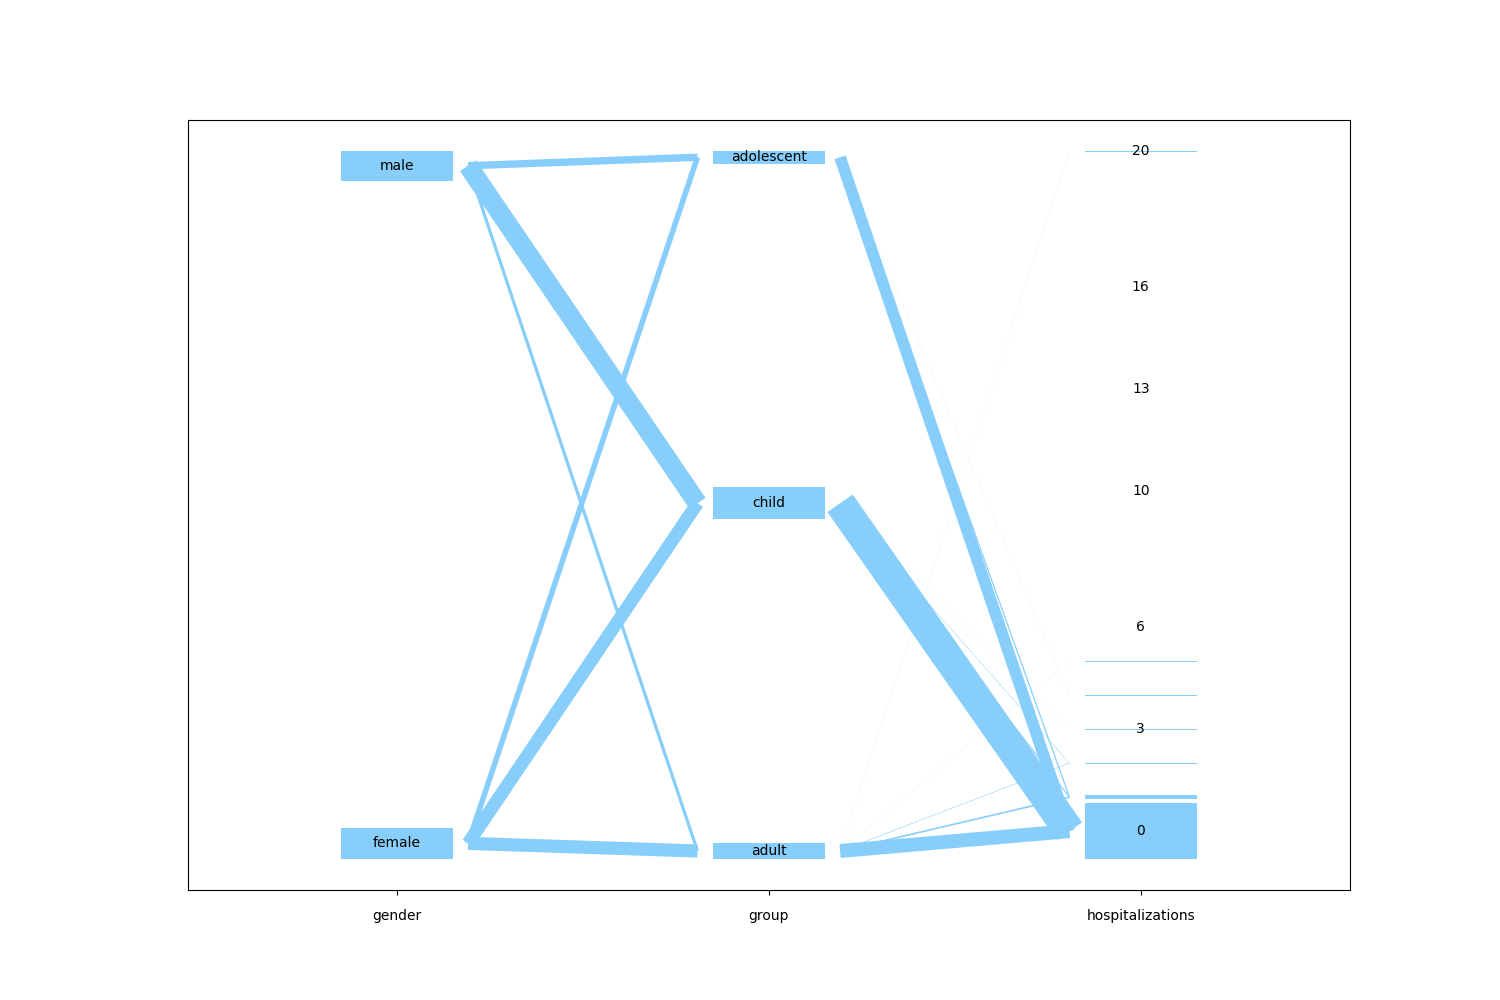
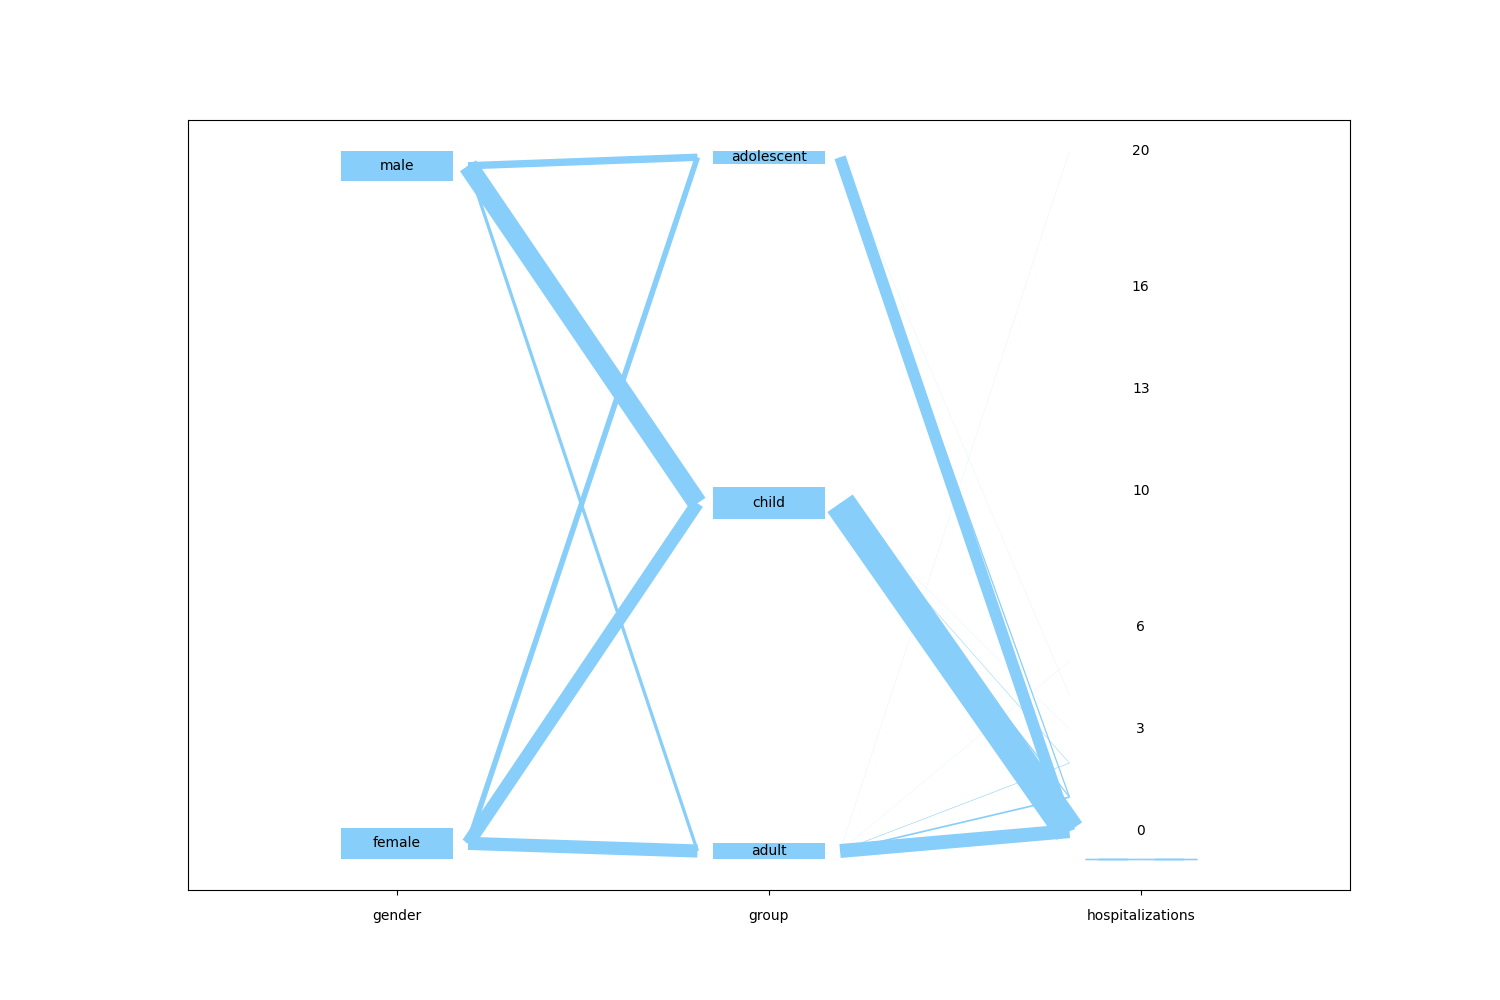

In [26]:
# general - var list
filename = "varlist.png"
var = ["gender", "group", "hospitalizations"]
df = df_asthma

hammock = hammock_plot.Hammock(df)
hammock.plot(
    var=var,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Variable List Test", filename)

## Value Ordering


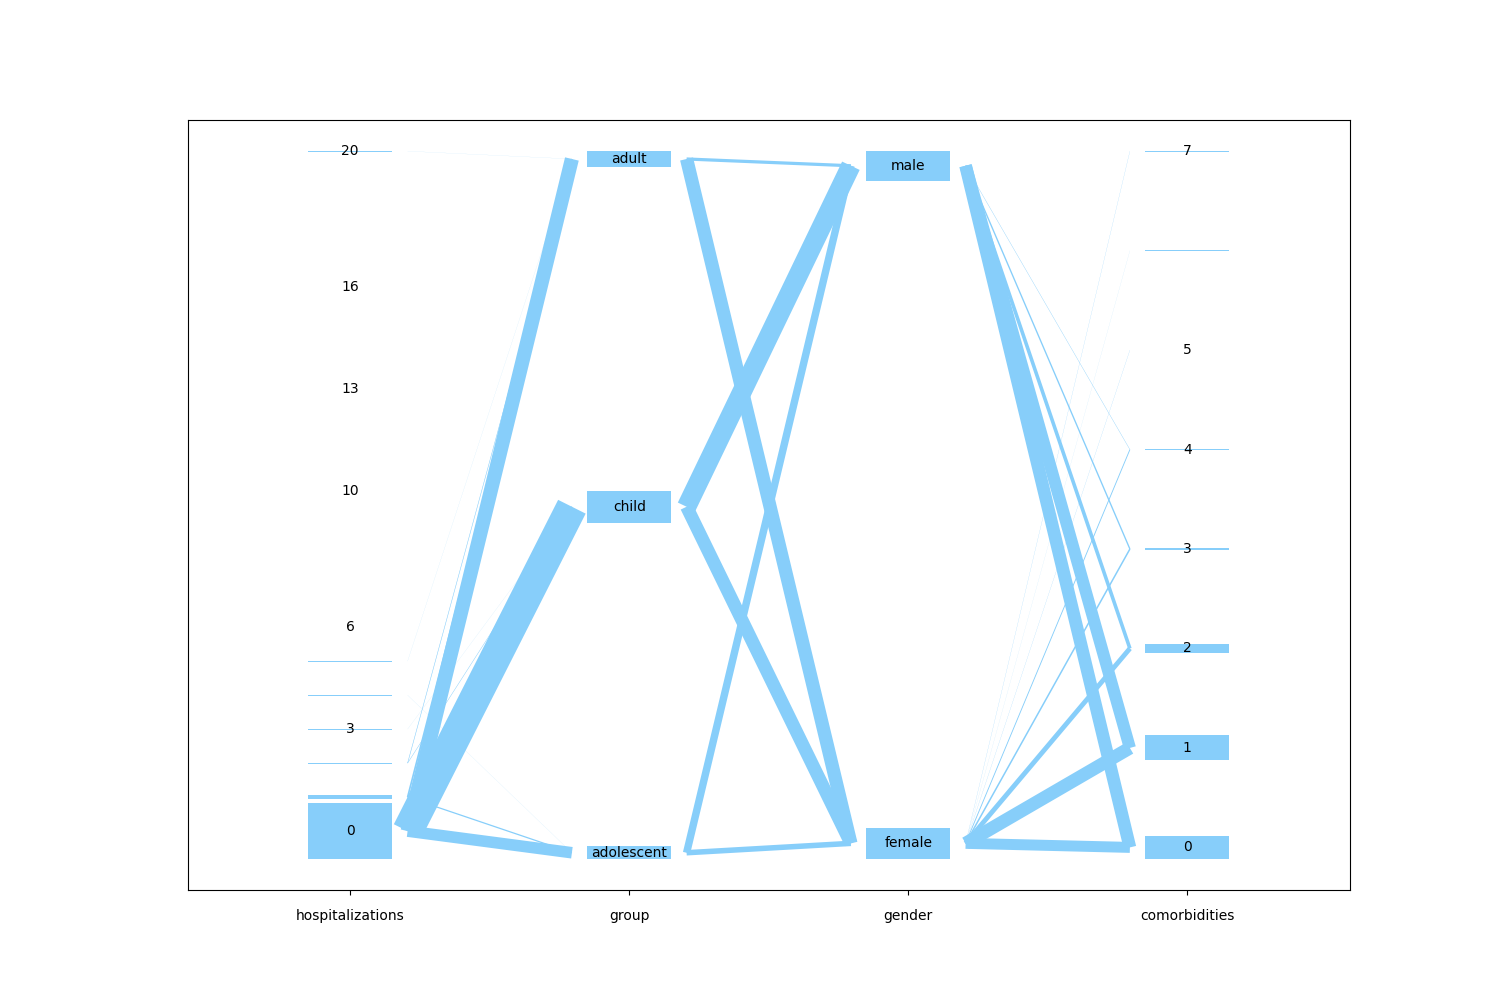
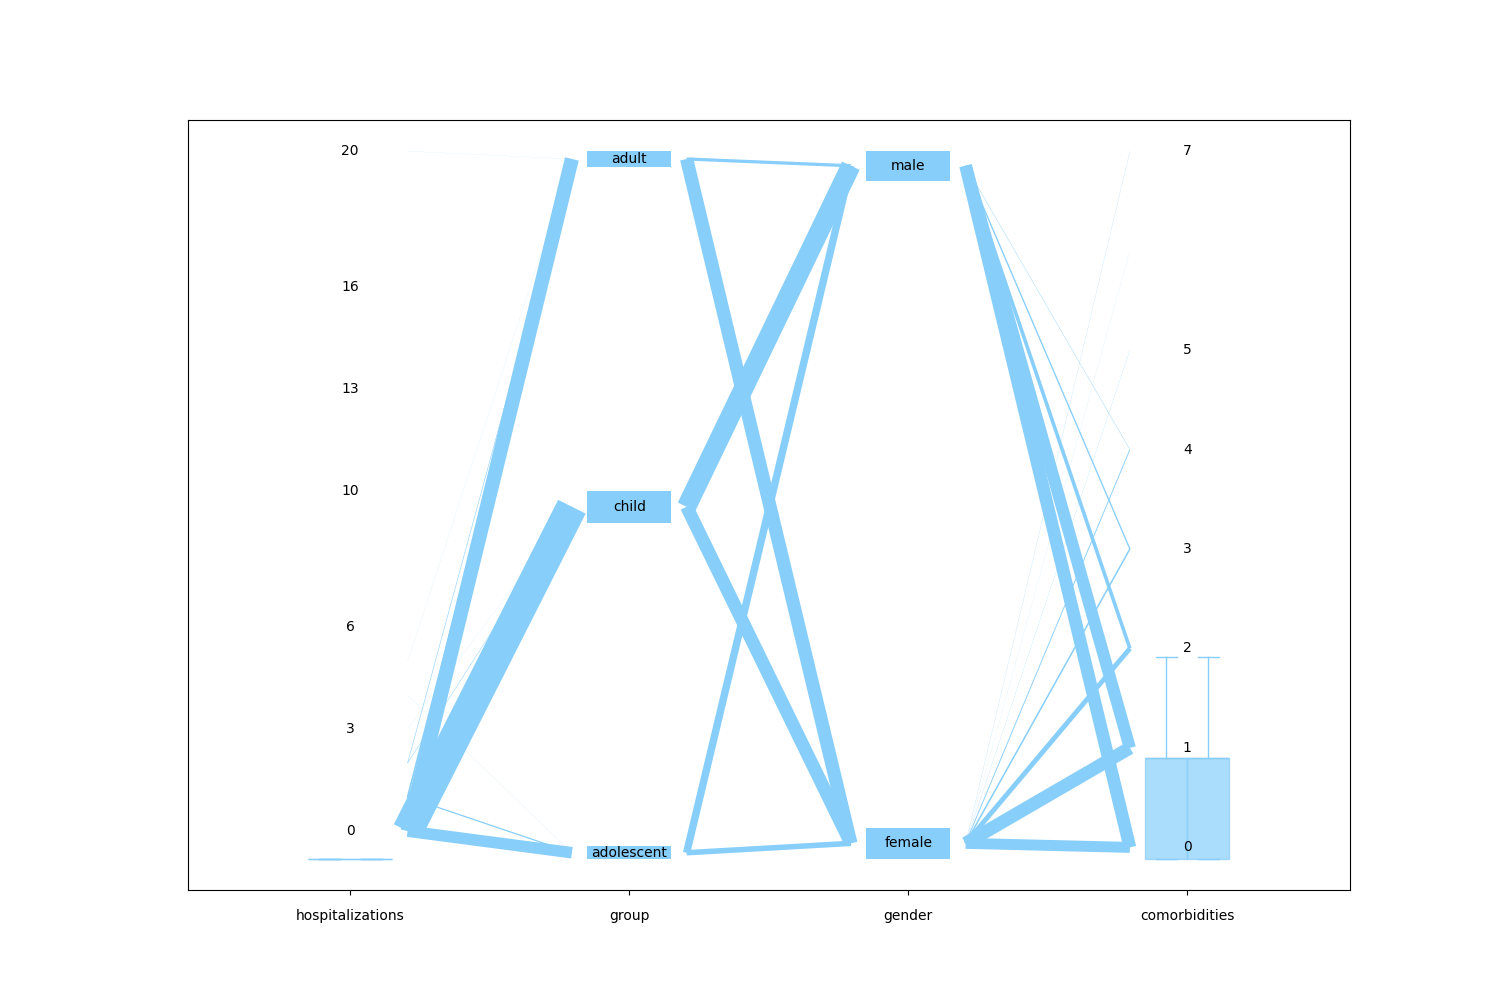

In [27]:
# general - value ordering
filename = "val_order.png"
value_order = {"group": ["adolescent", "child", "adult"]}
df = df_asthma
hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    value_order=value_order,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Value Order Test", filename)

## Missing Boolean


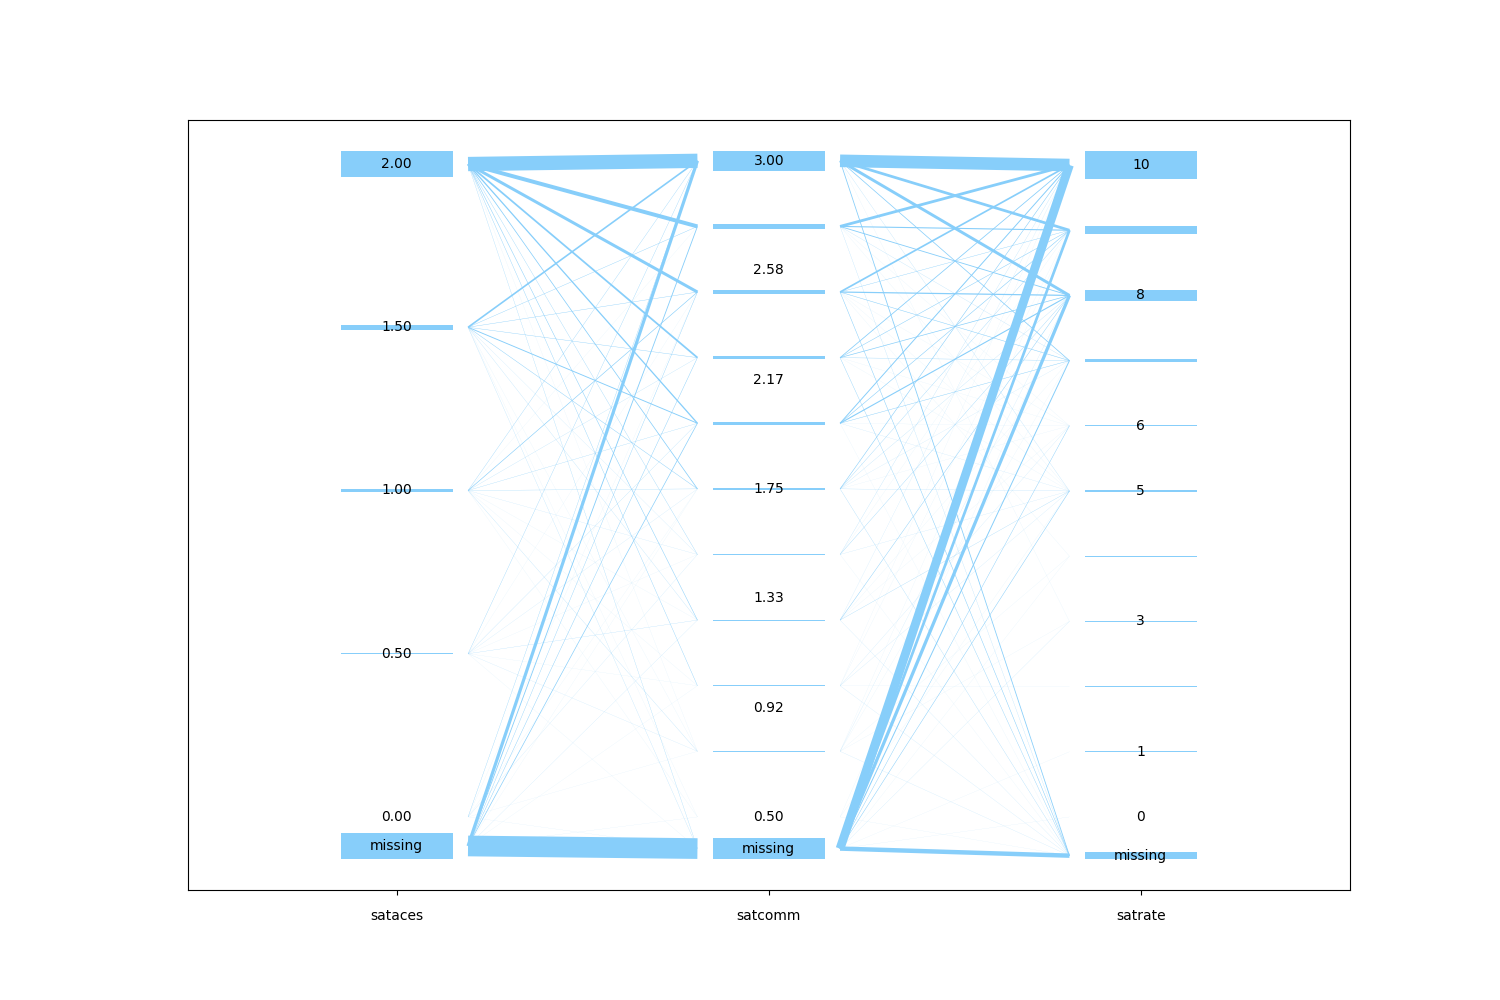
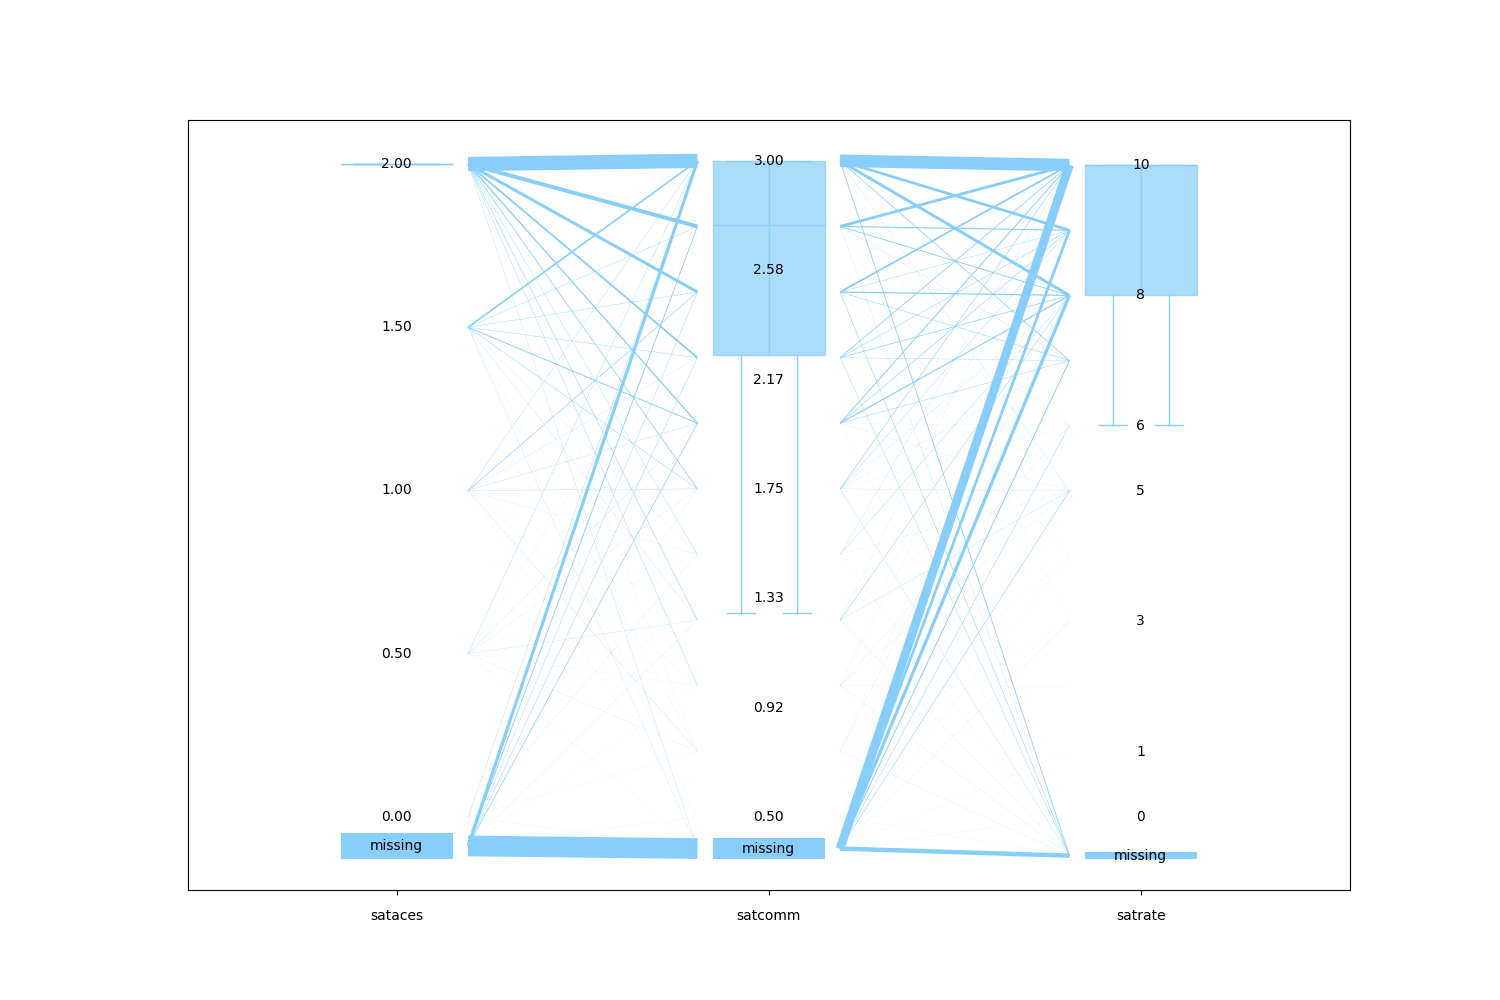

In [28]:
# general - missing boolean
filename = "missing_var.png"
df=df_diabetes

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    missing=True,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Missing Variable Test", filename)

## Labels off


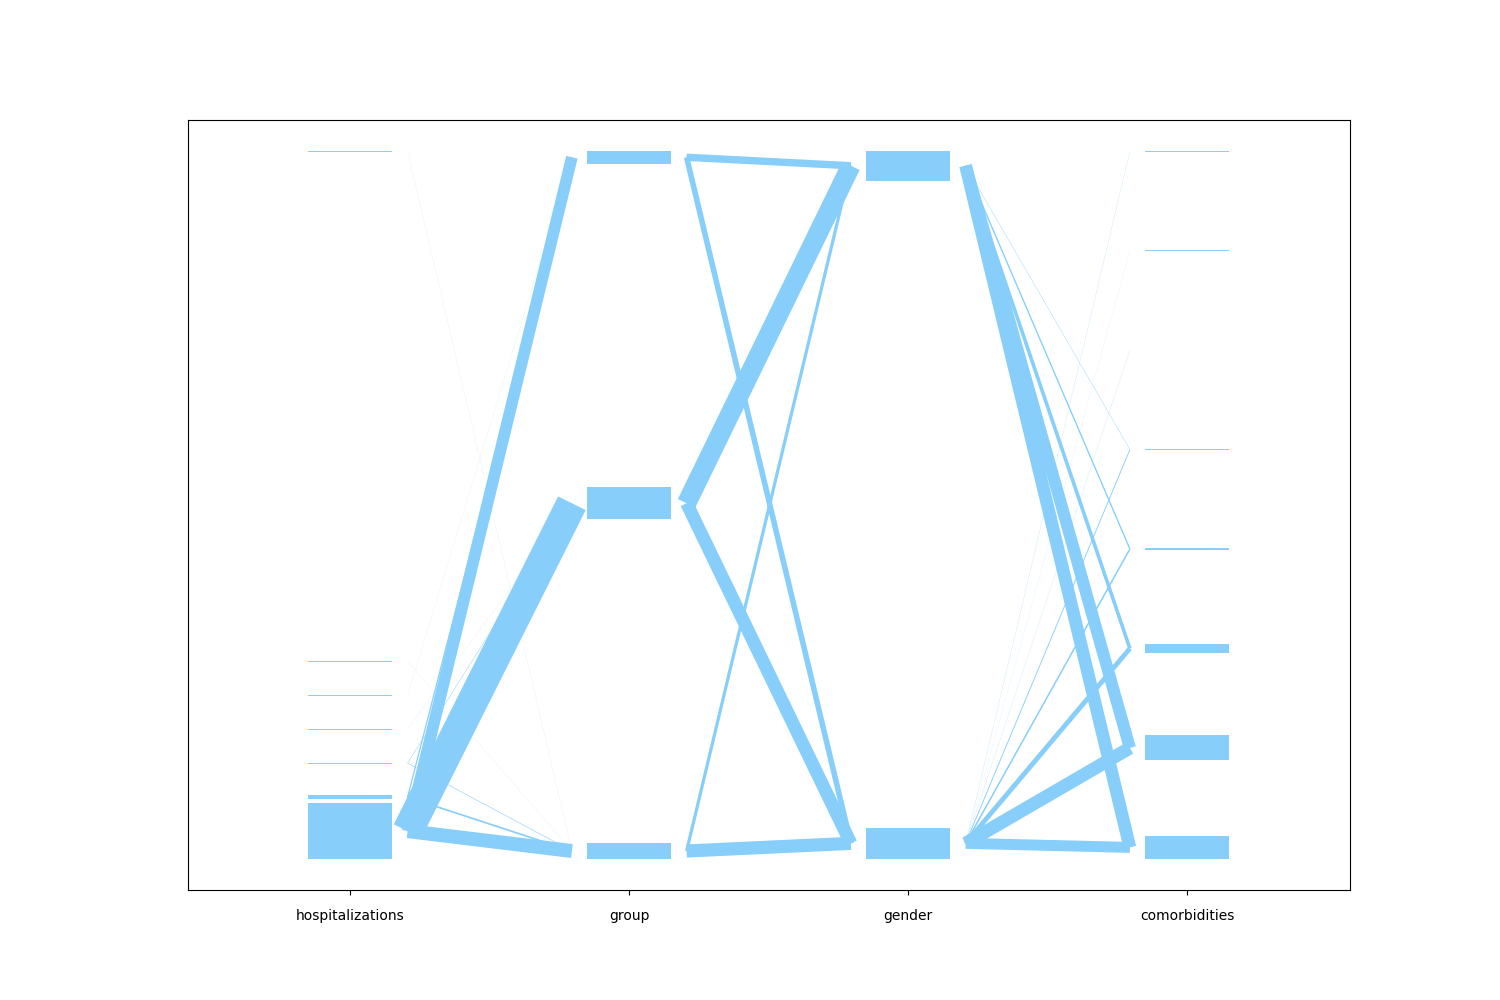
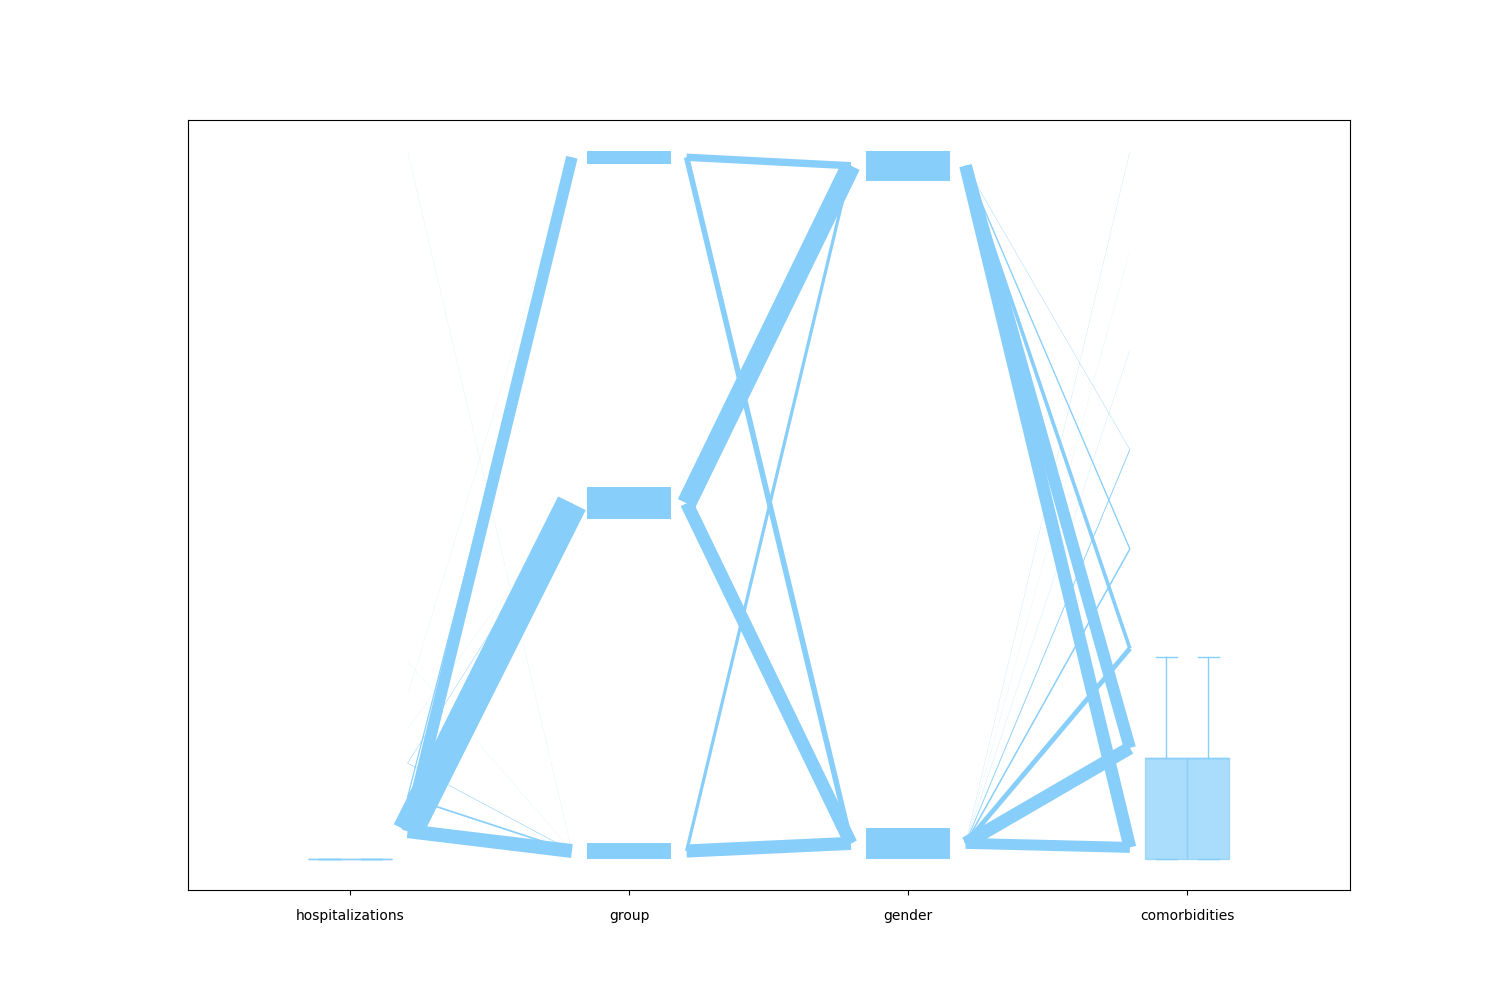

In [29]:
# general - label boolean
filename = "label_off.png"
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    label=False,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Labels off, Unibar off


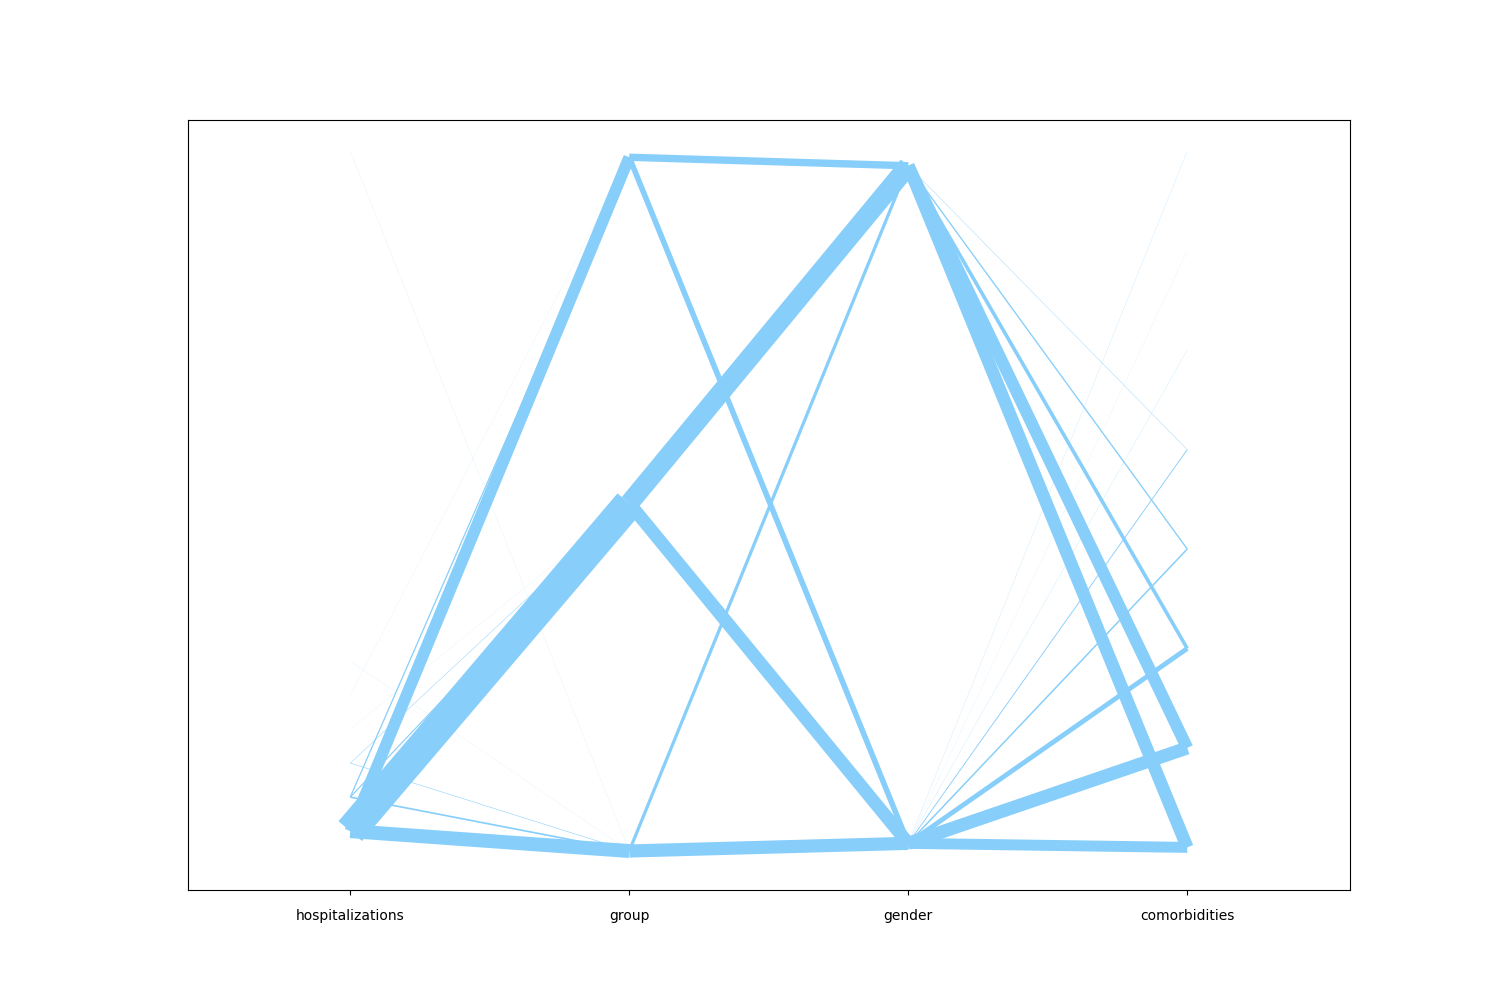
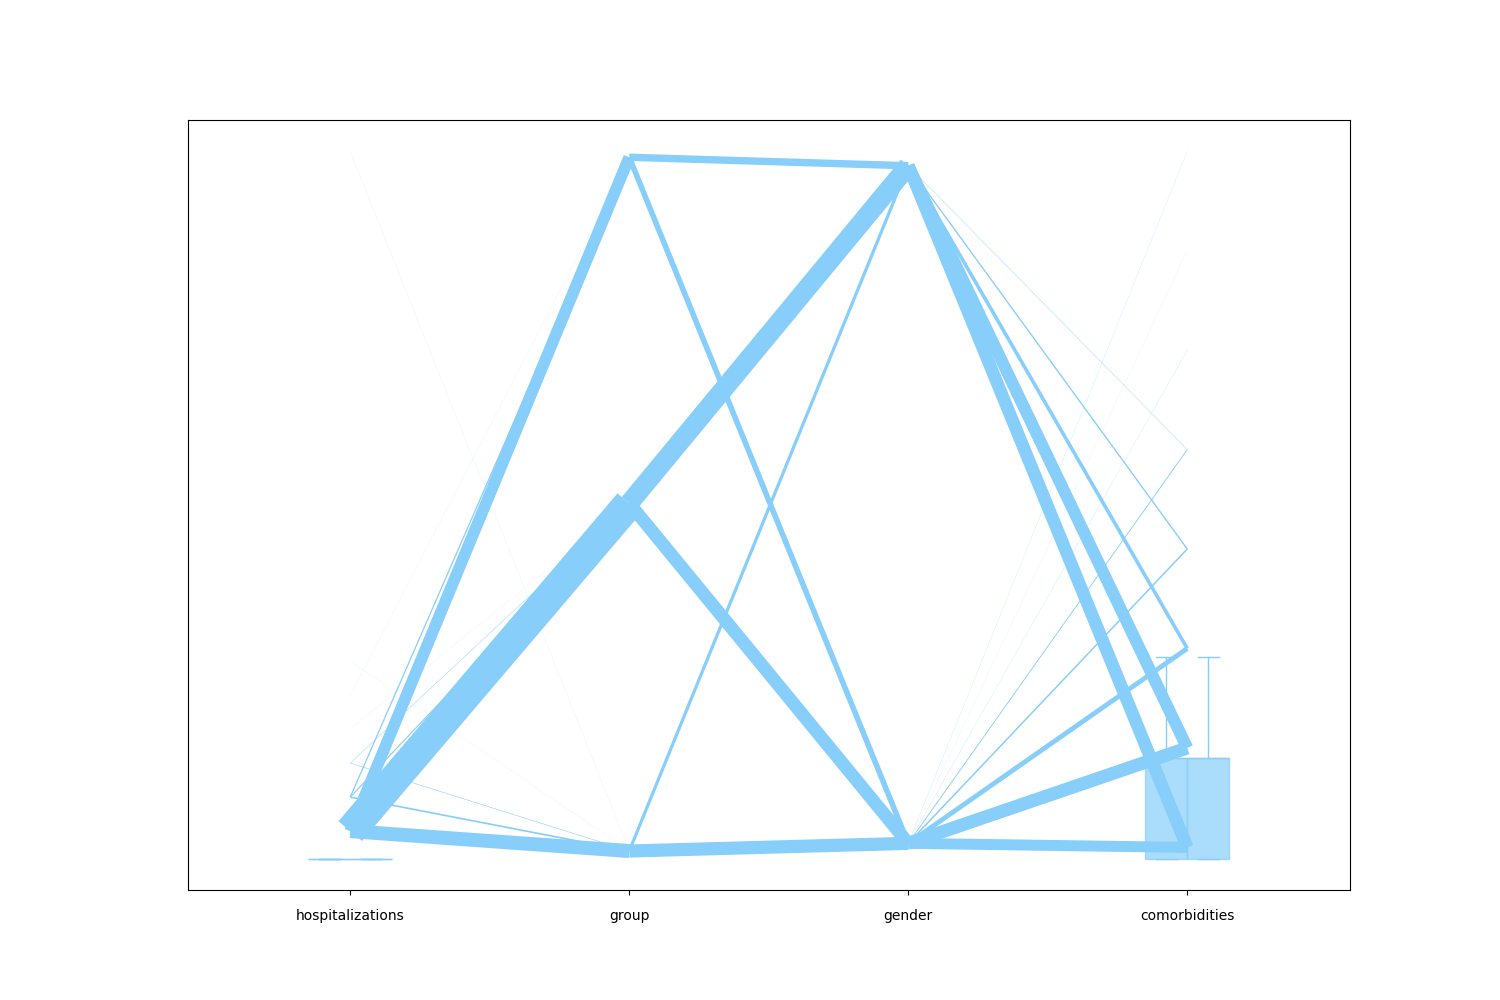

In [30]:
# general - label boolean
filename = "label_off_unibar_off.png"
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    label=False,
    unibar=False,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Unibar Test", filename)

## Labels on, Unibar off


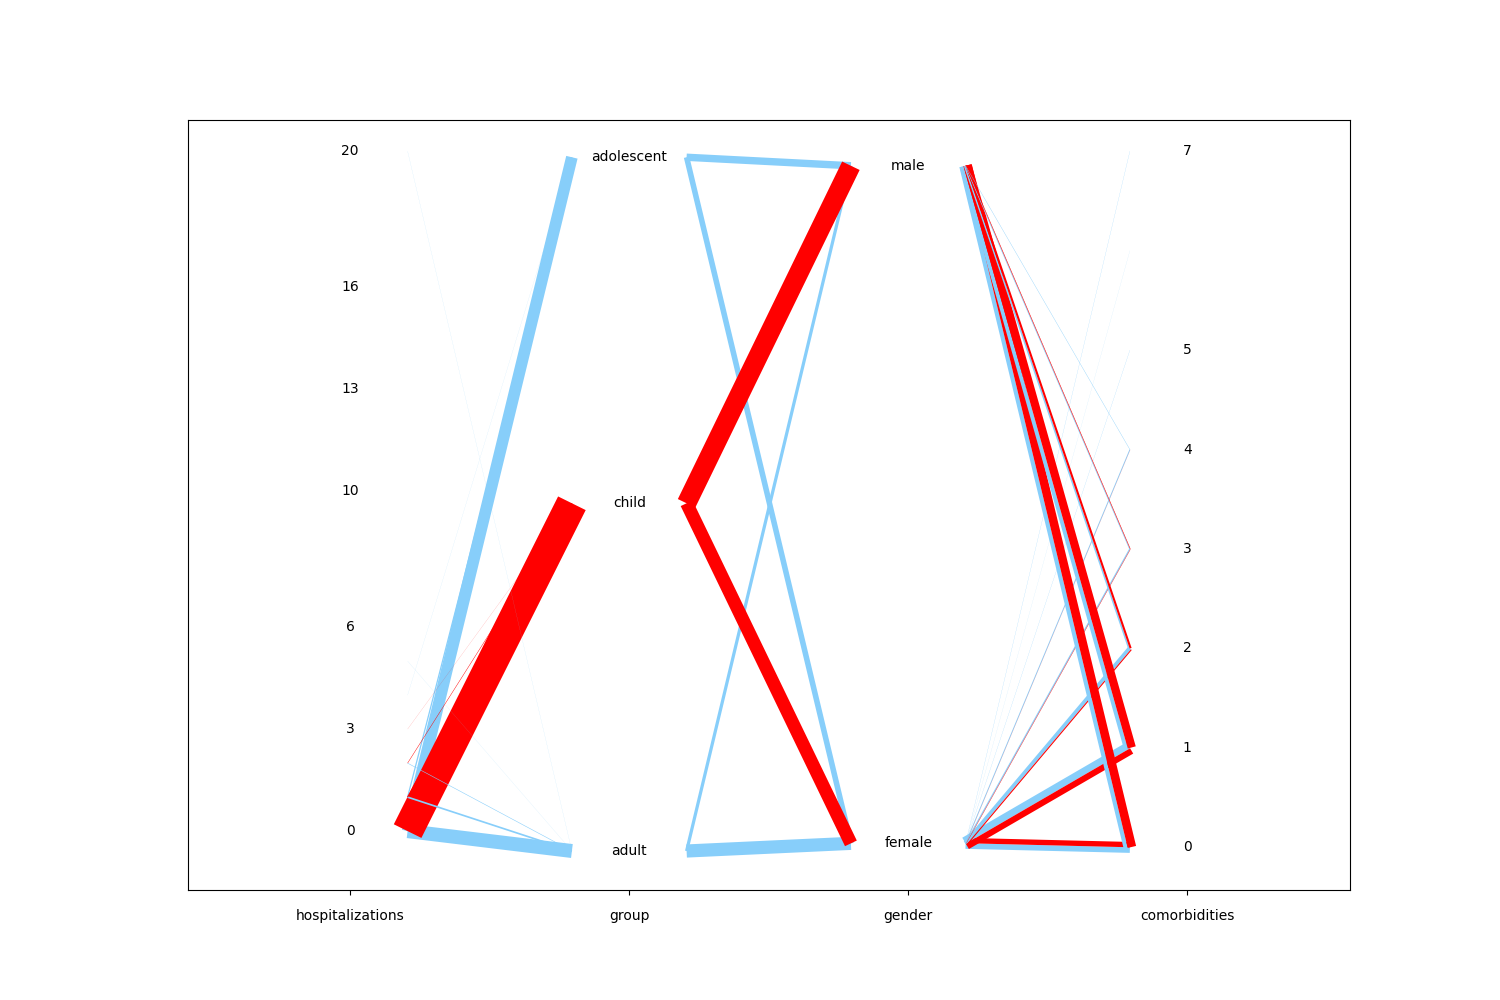
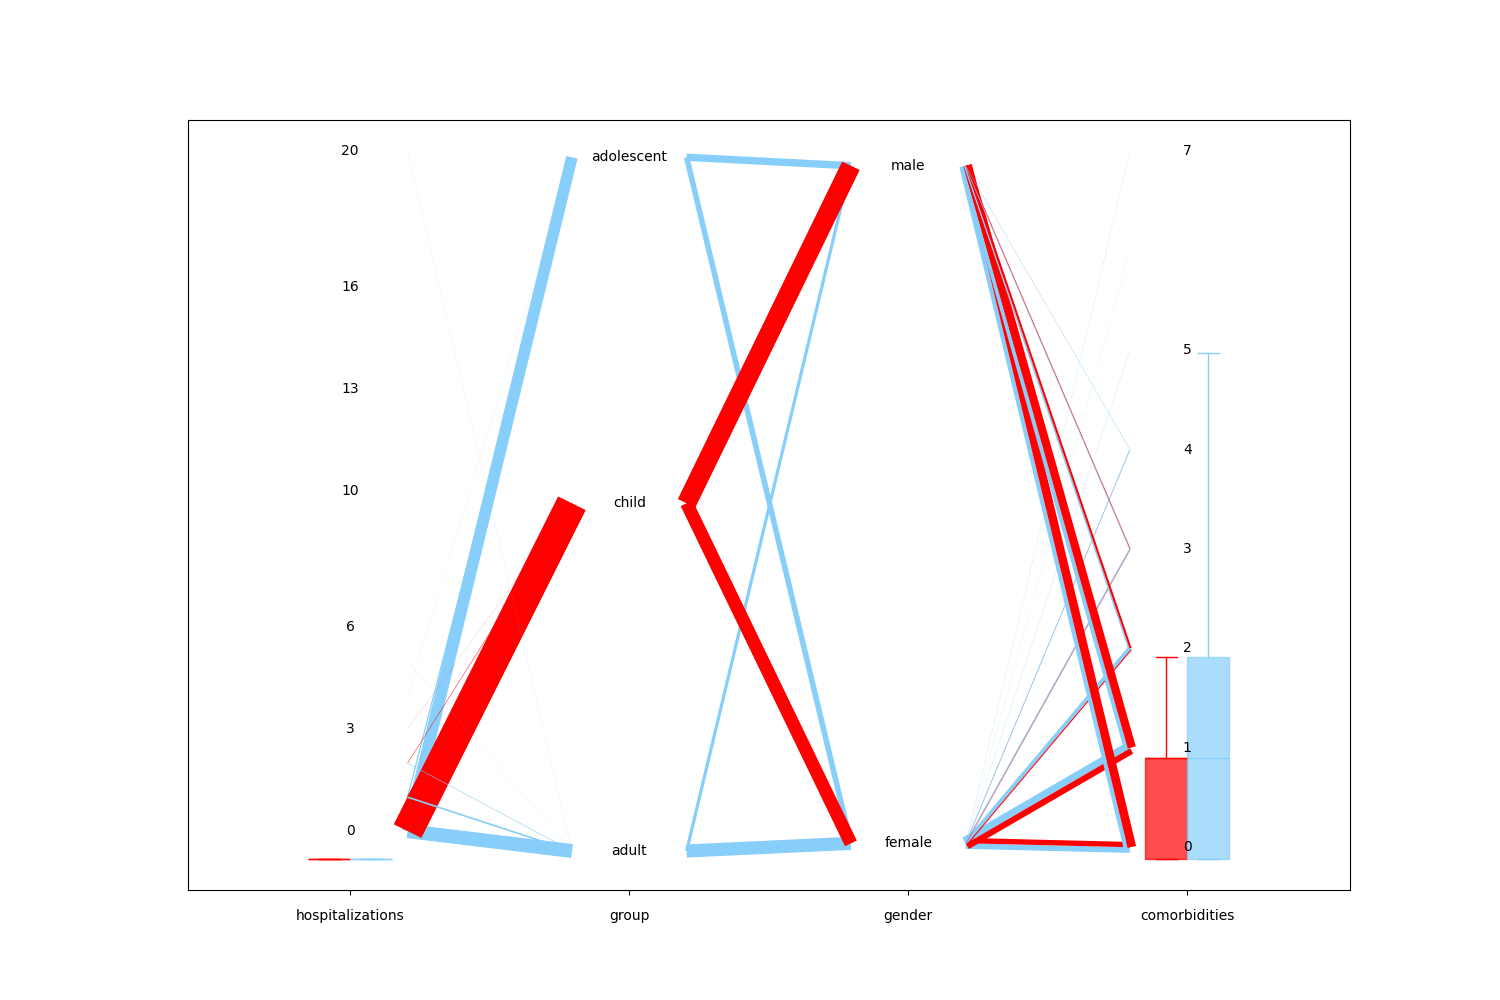

In [31]:
# general - label boolean
filename = "label_on_unibar_off.png"
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    unibar=False,
    hi_var="group",
    hi_value=["child"],
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Unibar Test", filename)

## Interval Variable Labels


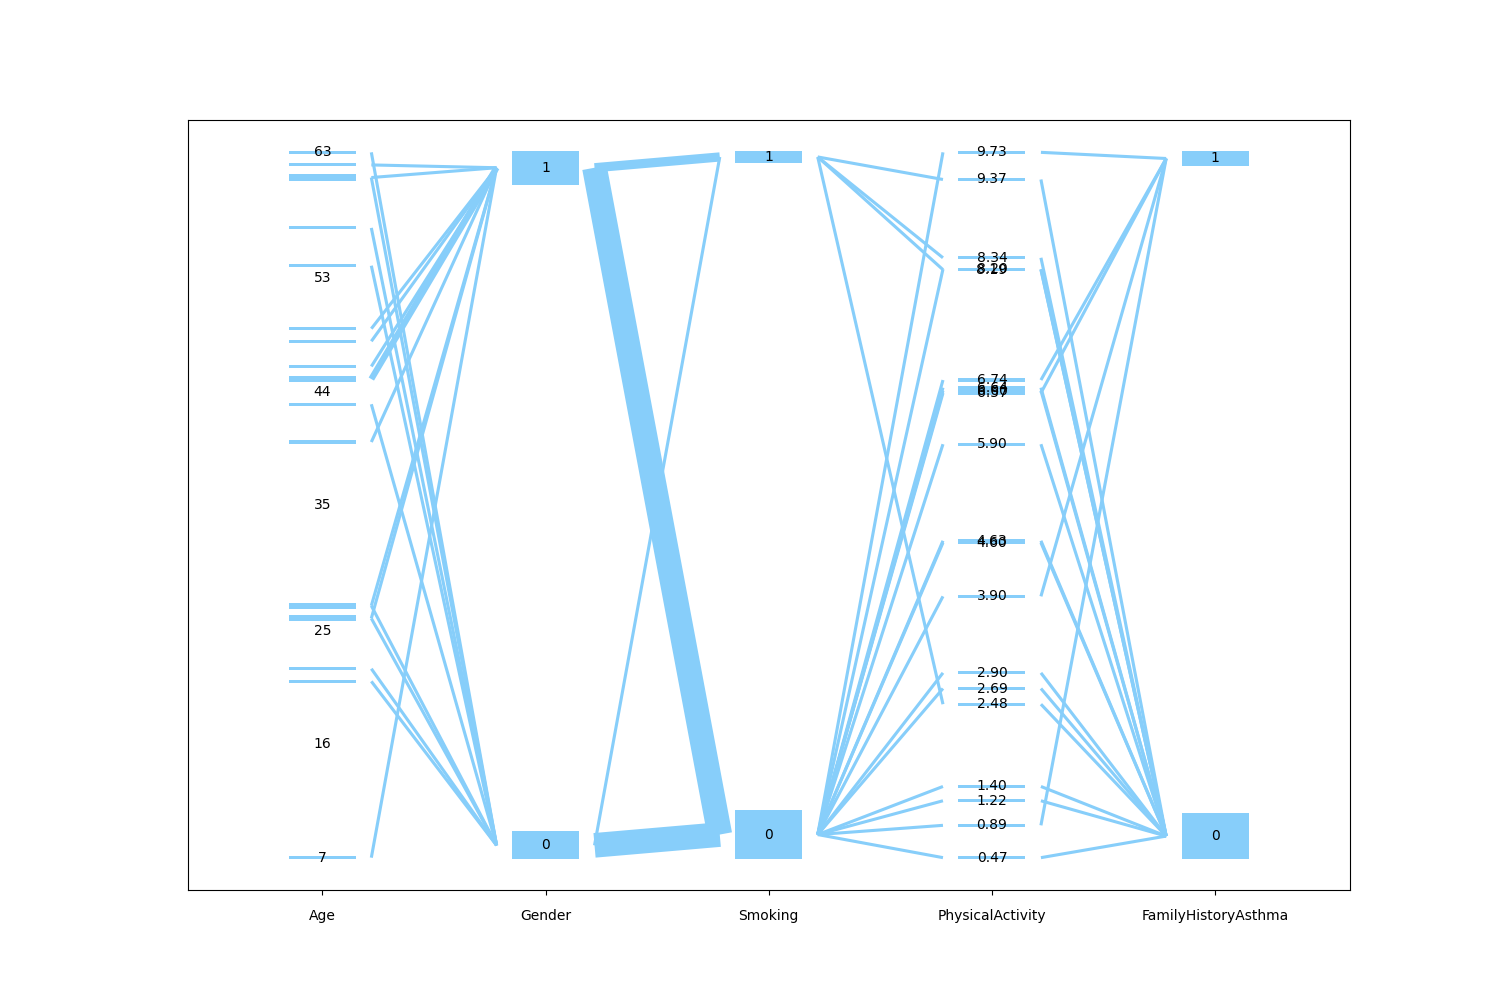
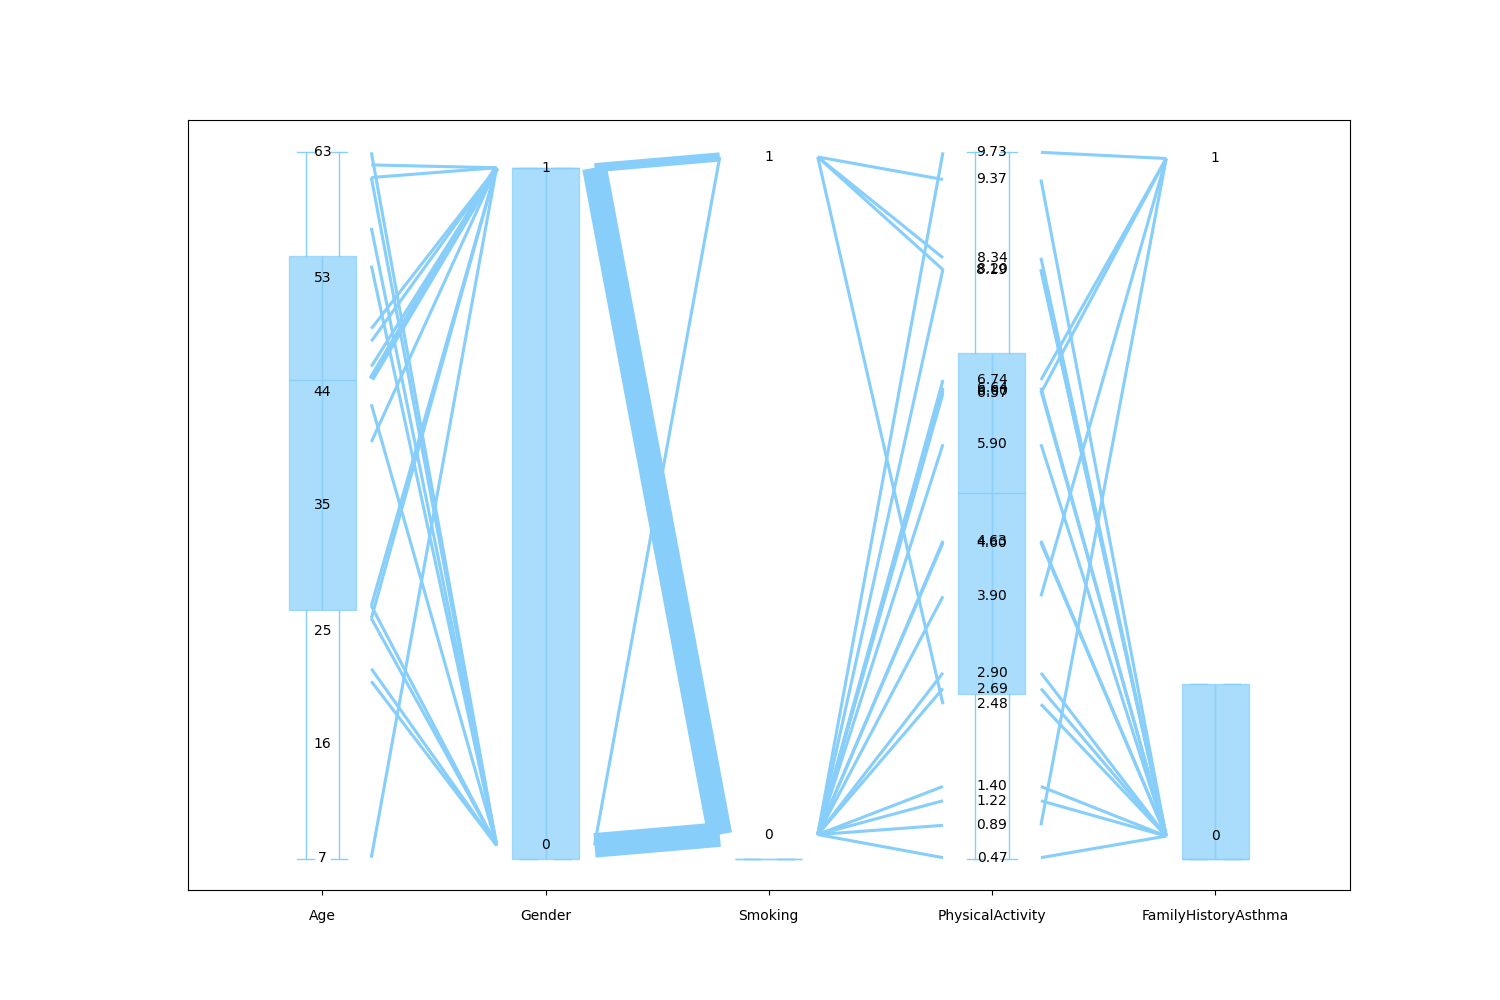

In [32]:
# numerical variable levels
filename = "interval_variables.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    numerical_var_levels={"Gender": 5, "PhysicalActivity": None},
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Interval Variable Levels Test", filename)

# Highlight tests
Test cases involving "highlight" hammock plot methods (following the categories in README.md)

## Highlight categorical values


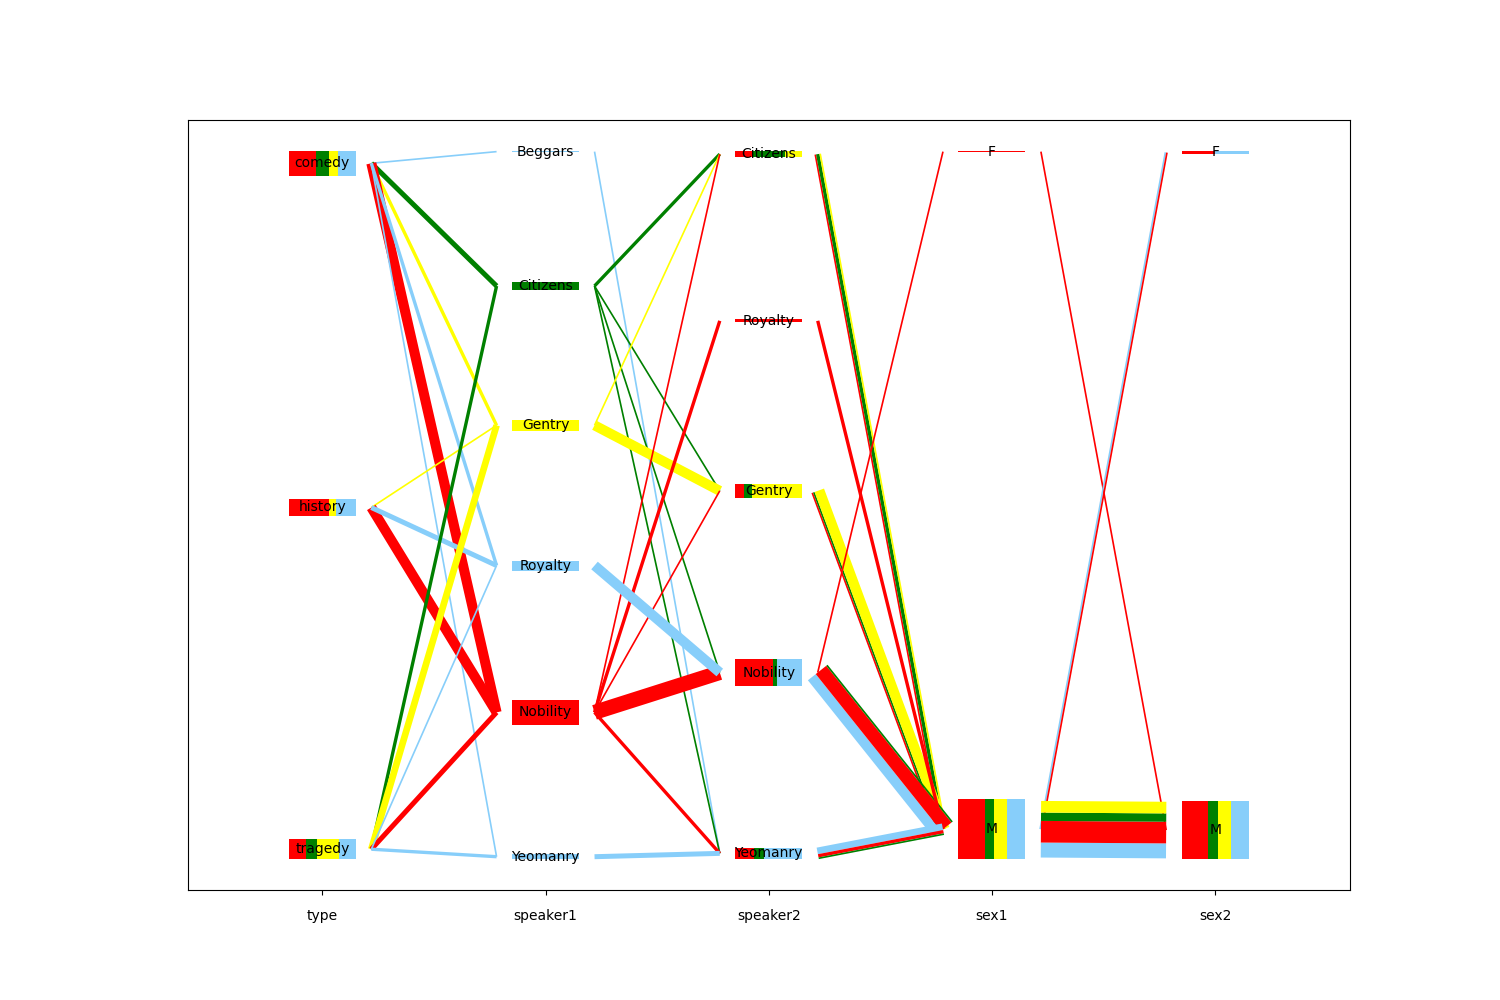
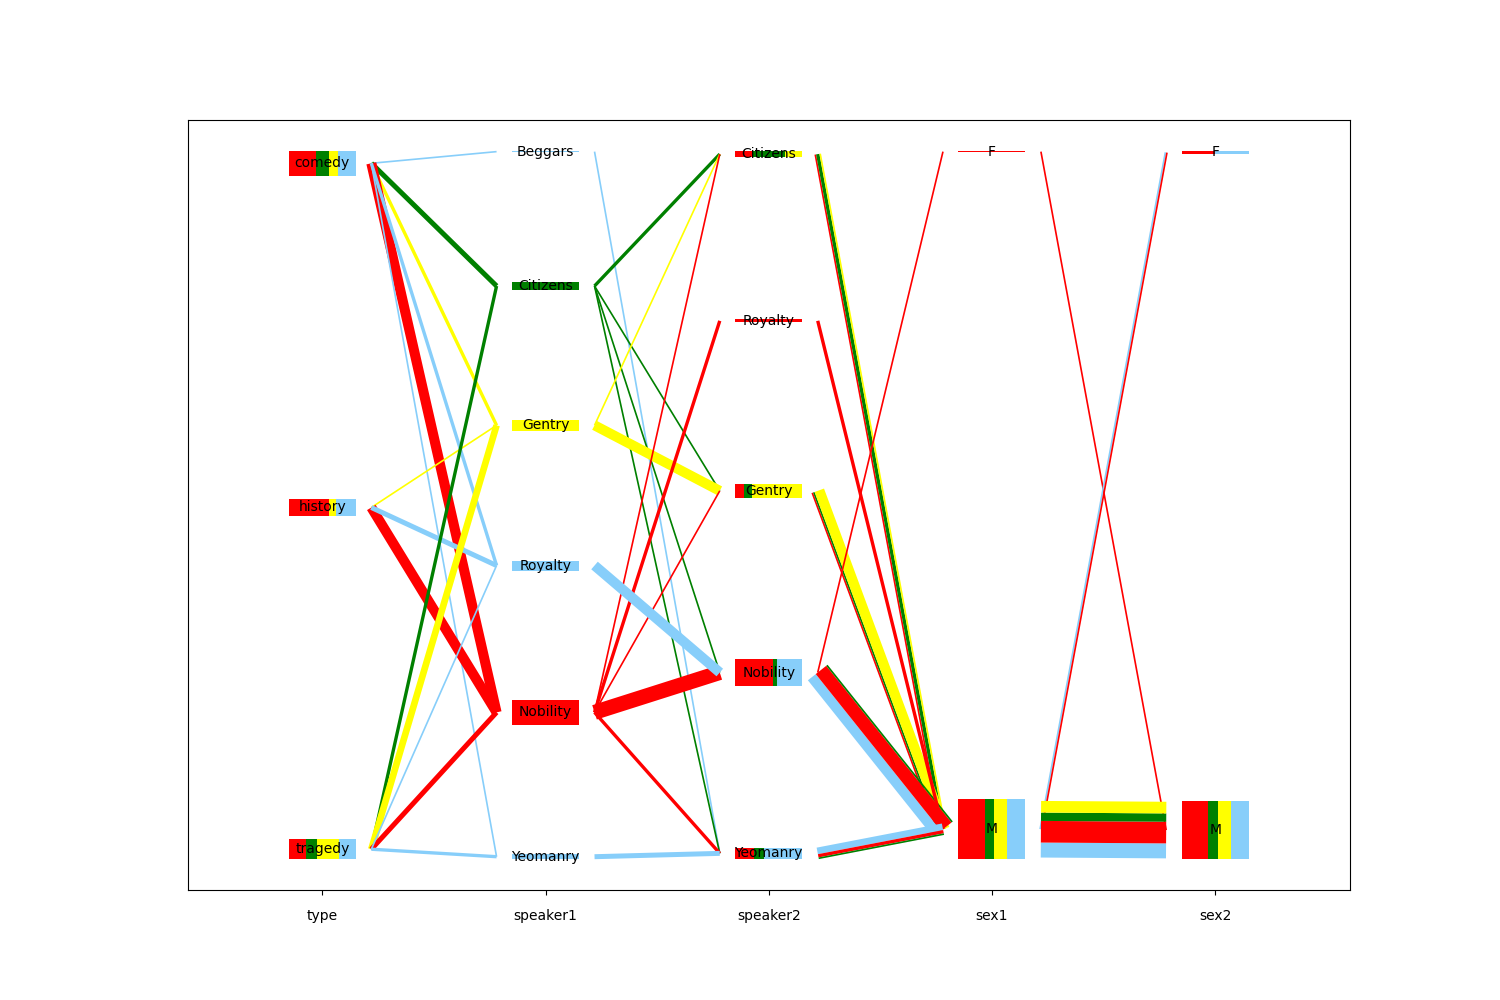

In [33]:
# highlight - value - categorical
filename = "highlight_var_categorical.png"
df = df_shakespeare

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= [item for item in list(df) if item != "play_name"],
    display_figure=False,
    hi_var="speaker1",
    hi_value=["Nobility","Citizens","Gentry"],
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Categorical Variables Test", filename)

## Highlight range of values


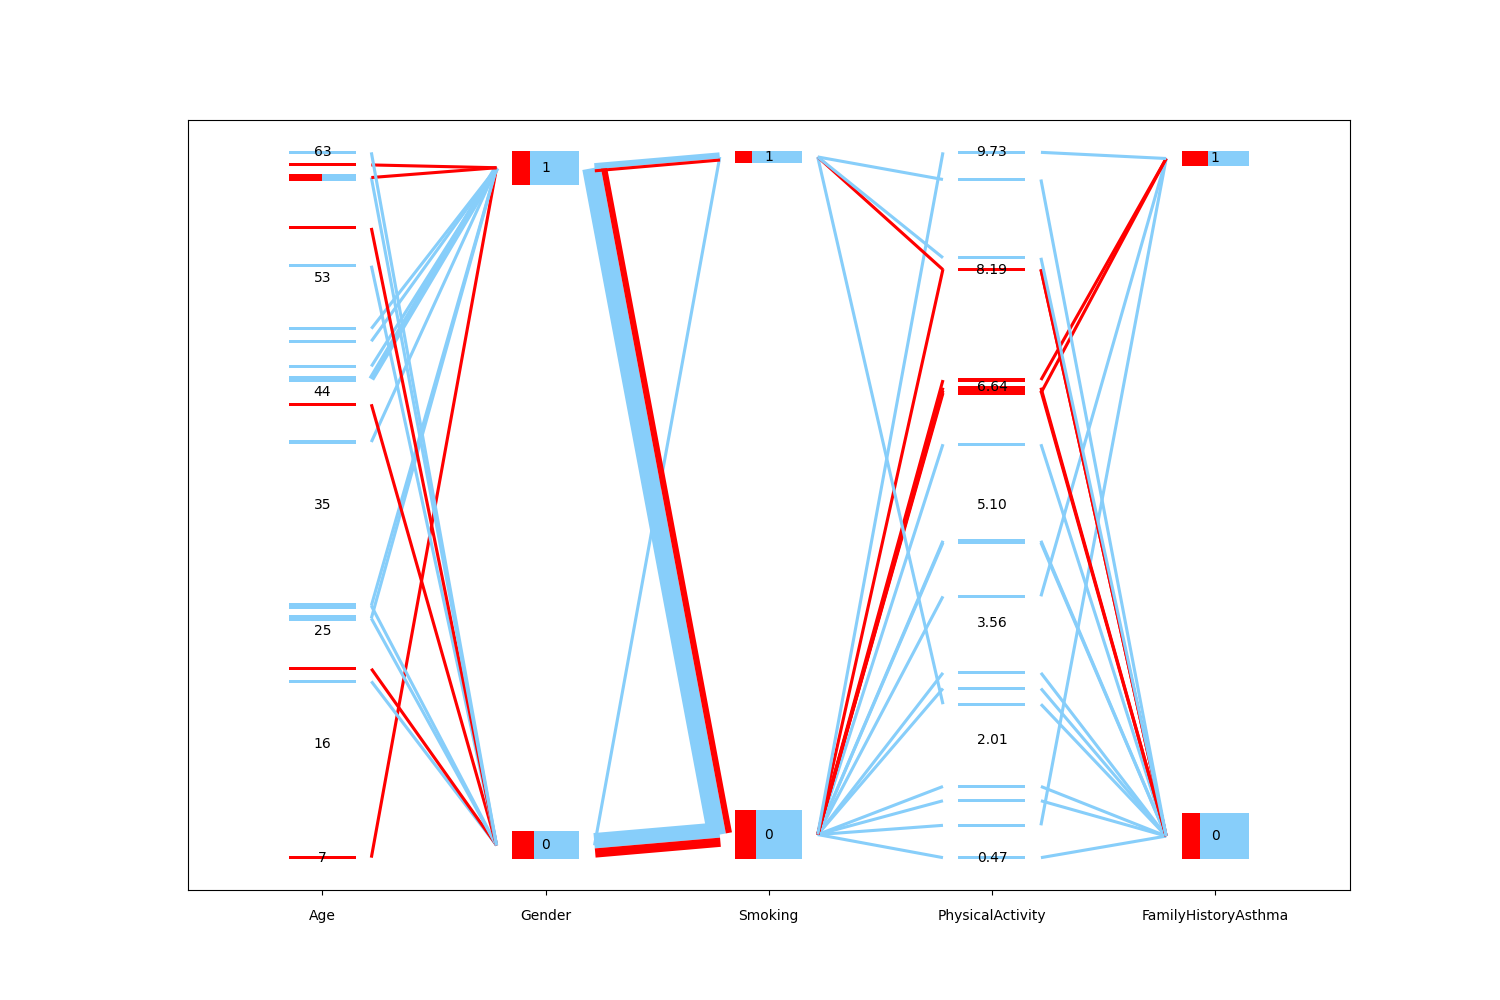
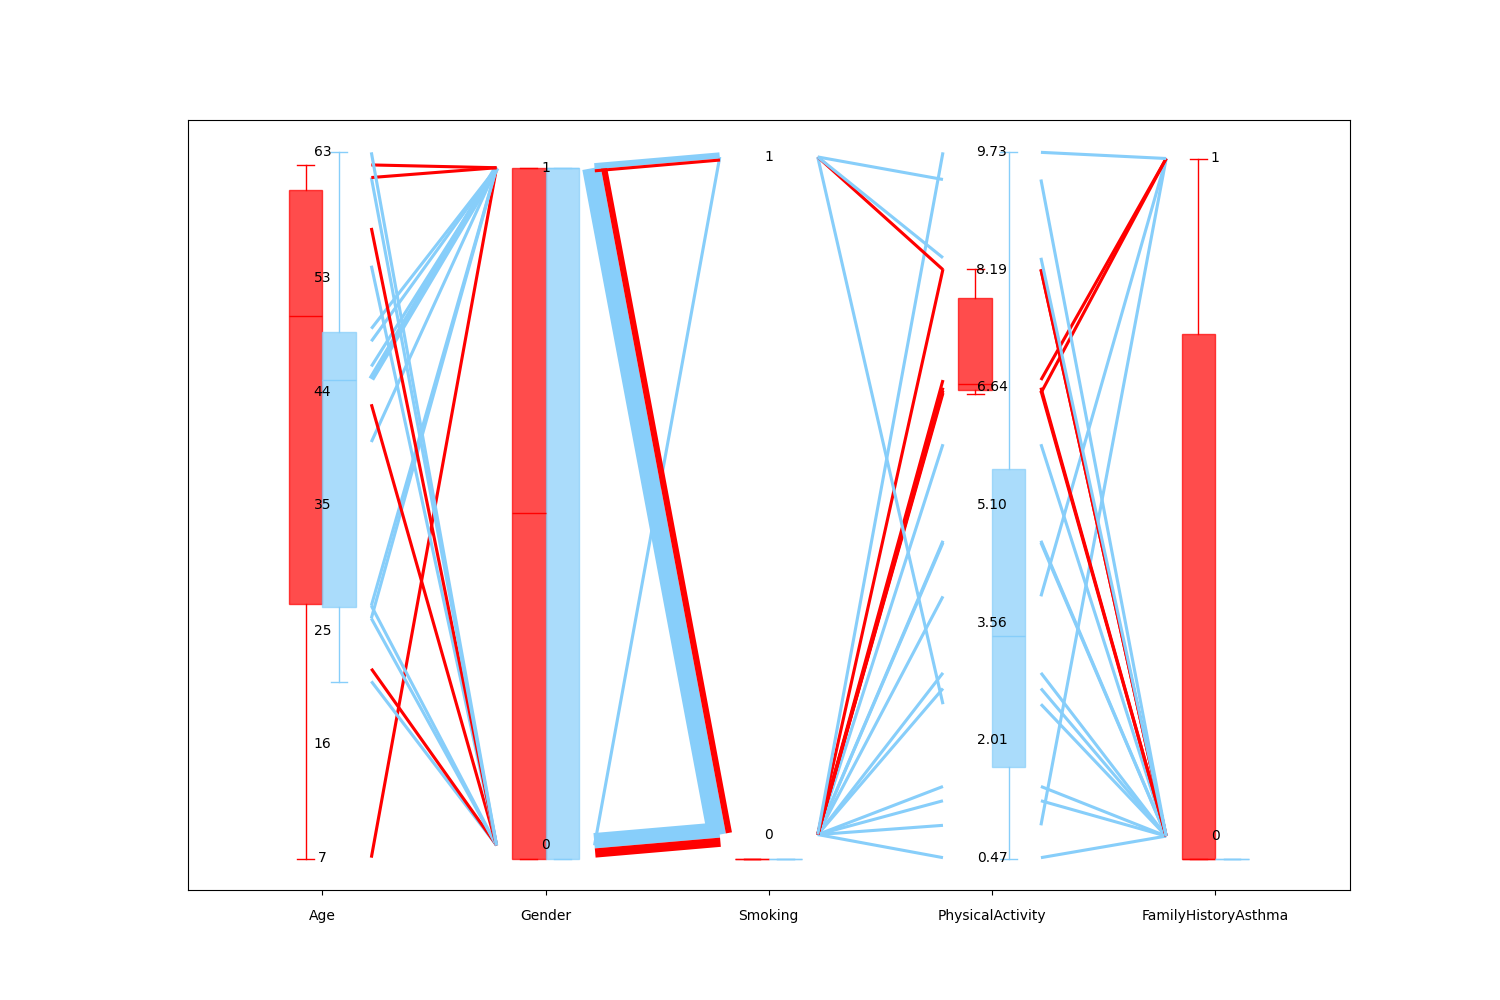

In [34]:
# highlight - value - expression
# NOTE: this is wrong - the values should be rounded but they're not being rounded.
# NOTE: bar size is also different from when the range is not highlighted.
filename = "highlight_var_range.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    hi_var="PhysicalActivity",
    hi_value="6.5<x<8.2",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Variable Range Test", filename)

## Highlight boxes (horizontal)


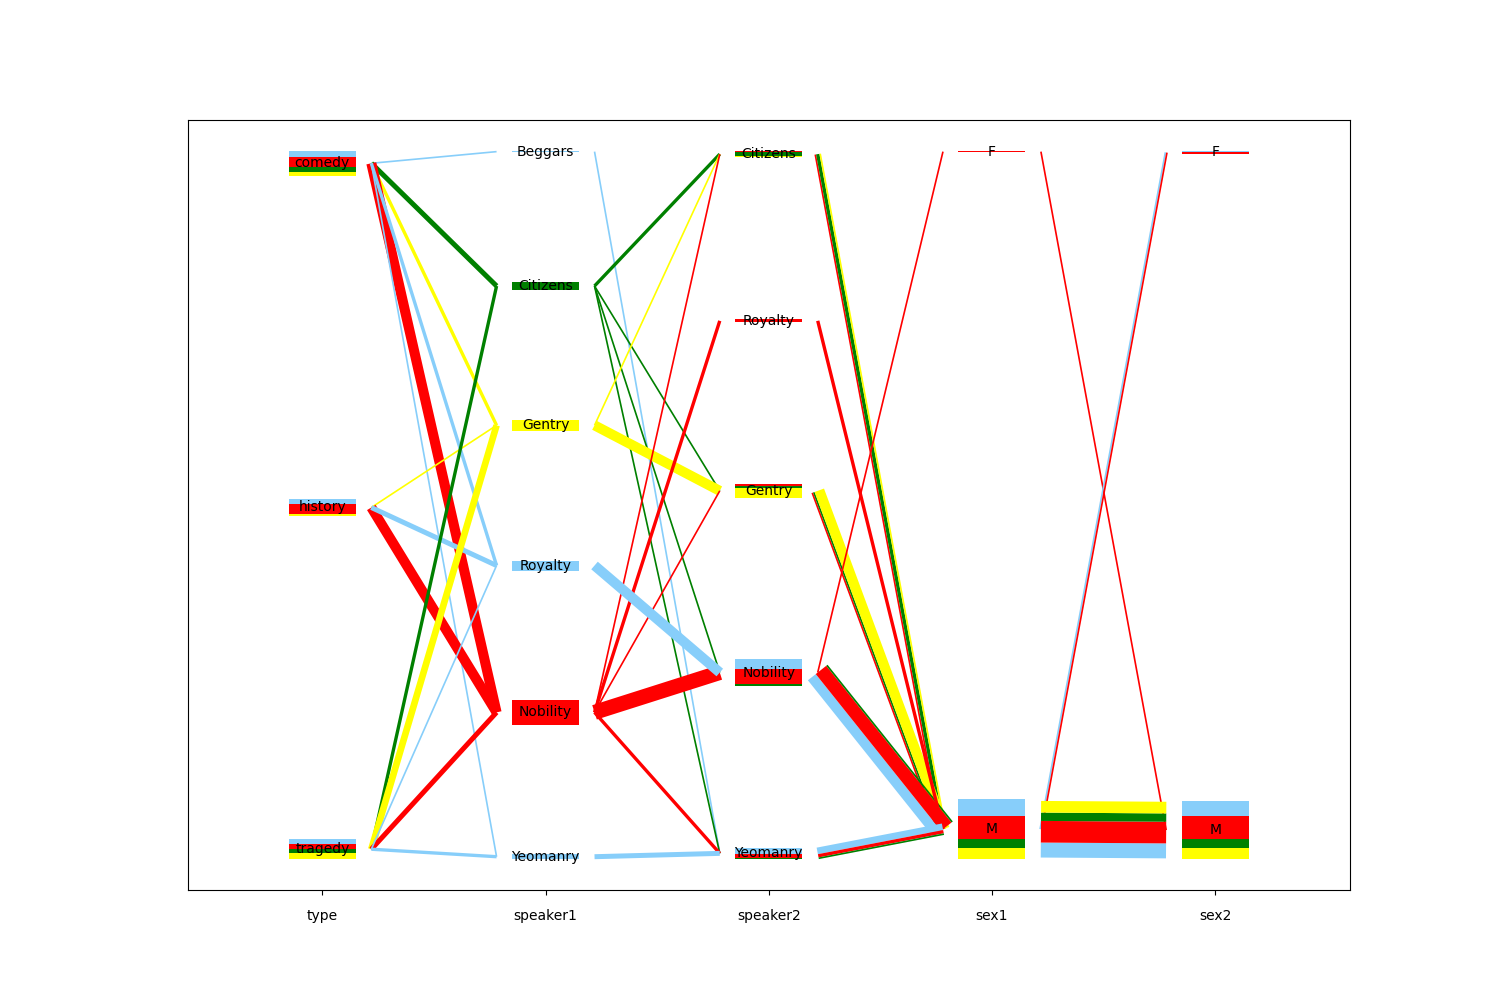
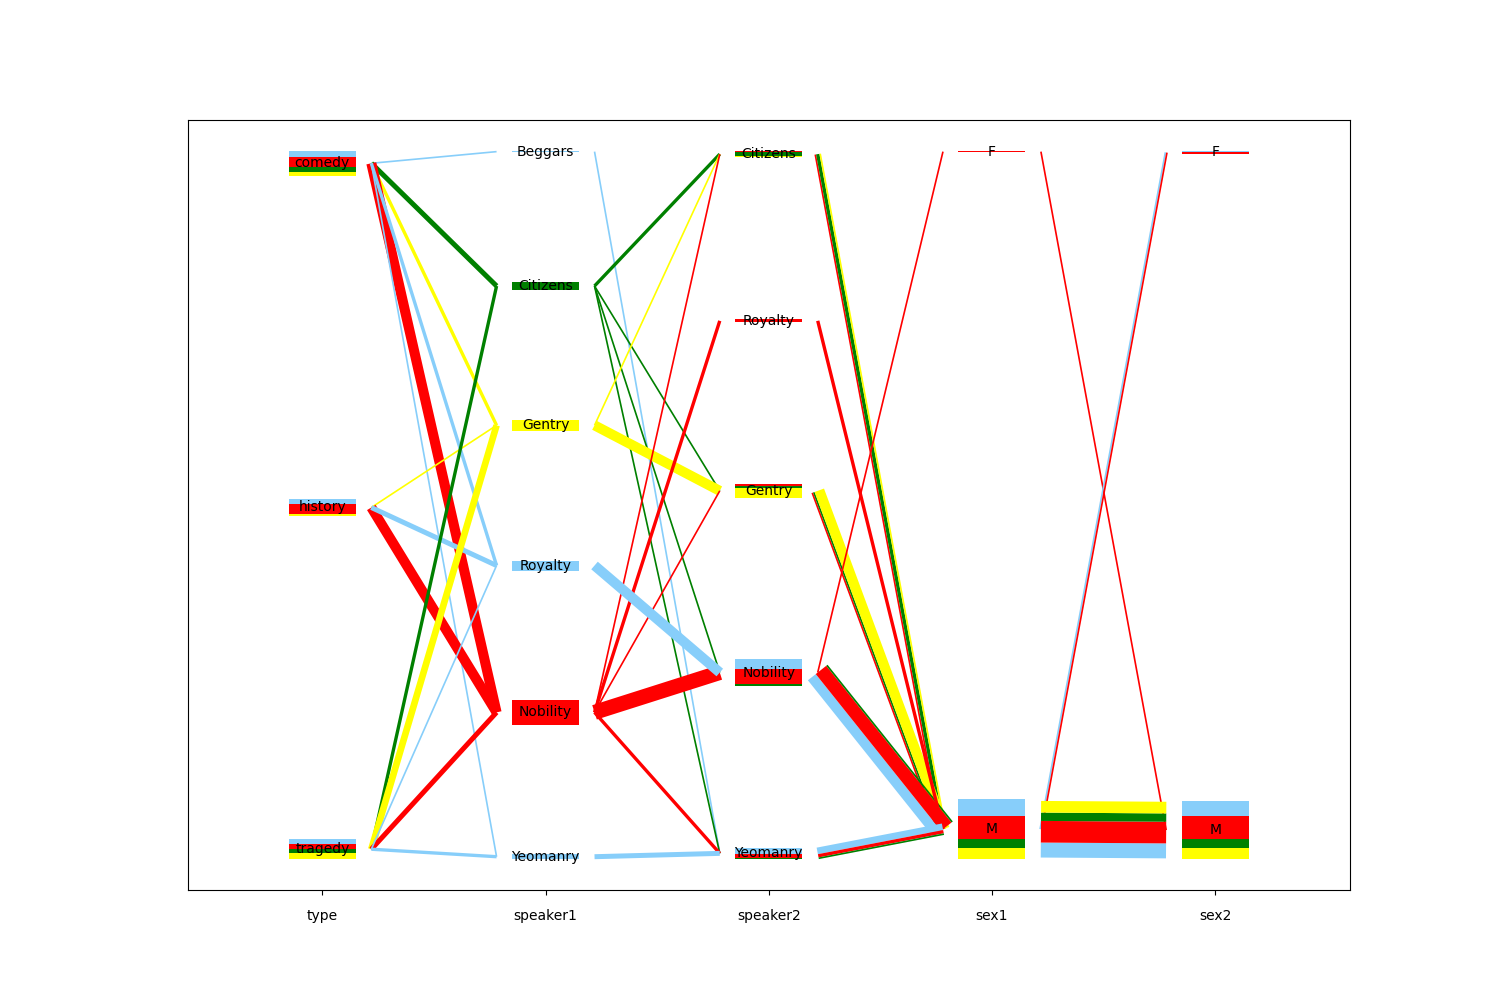

In [35]:
# highlight - horizontal
filename = "highlight_horizontal.png"
df = df_shakespeare

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= [item for item in list(df) if item != "play_name"],
    display_figure=False,
    hi_var="speaker1",
    hi_value=["Nobility","Citizens","Gentry"],
    hi_box="horizontal",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Box = Horizontal Test", filename)

## Highlight missing variable


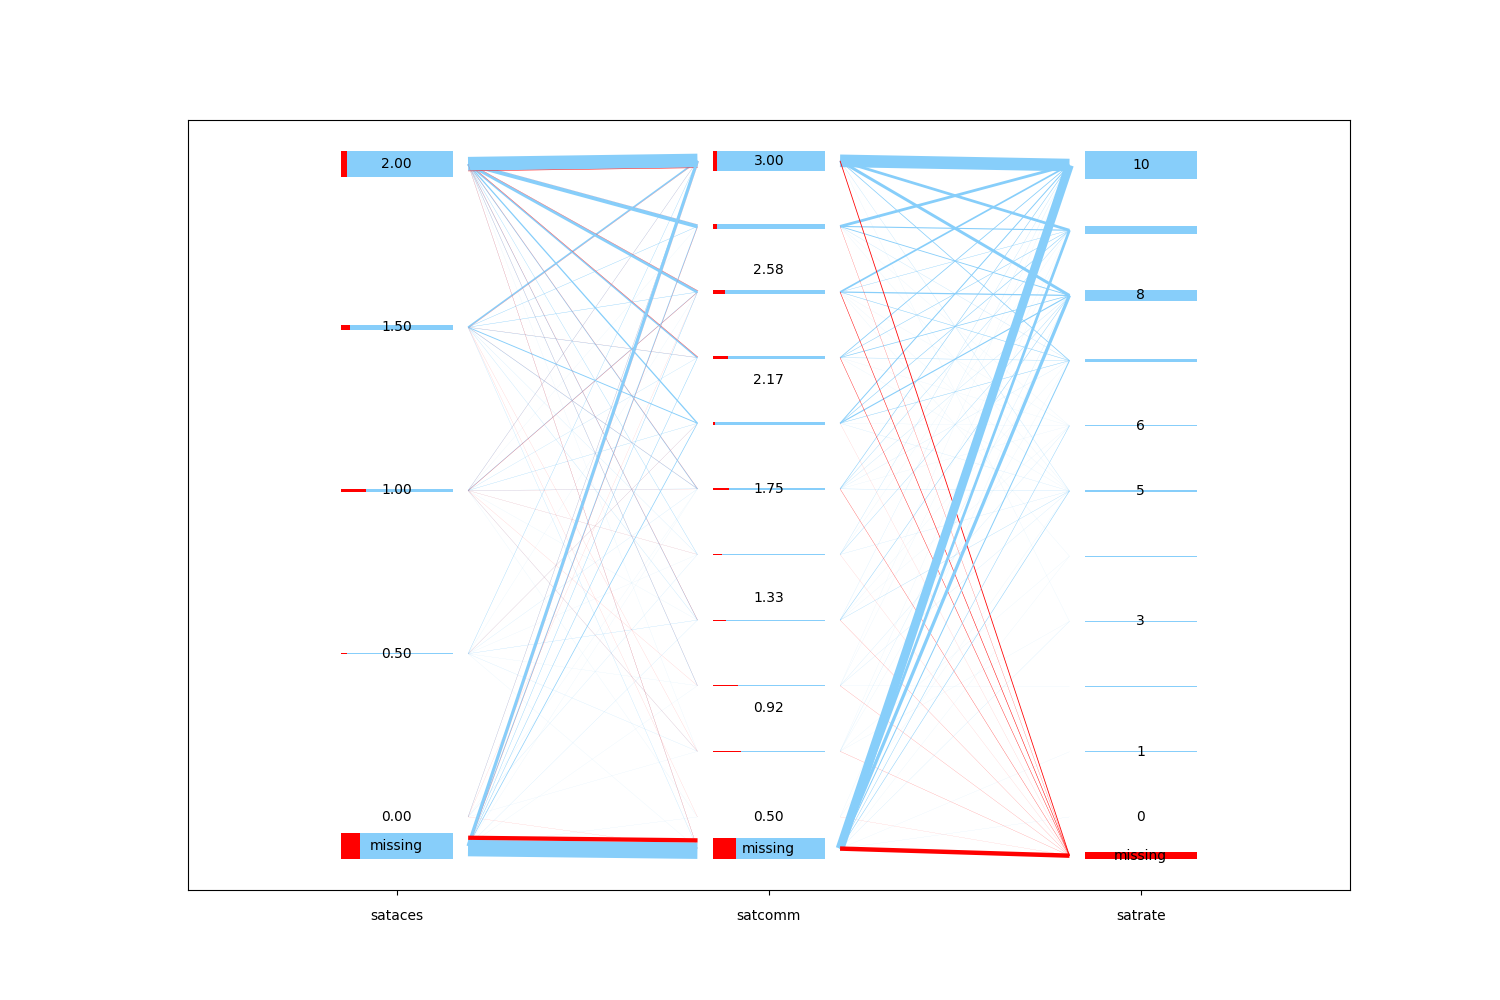
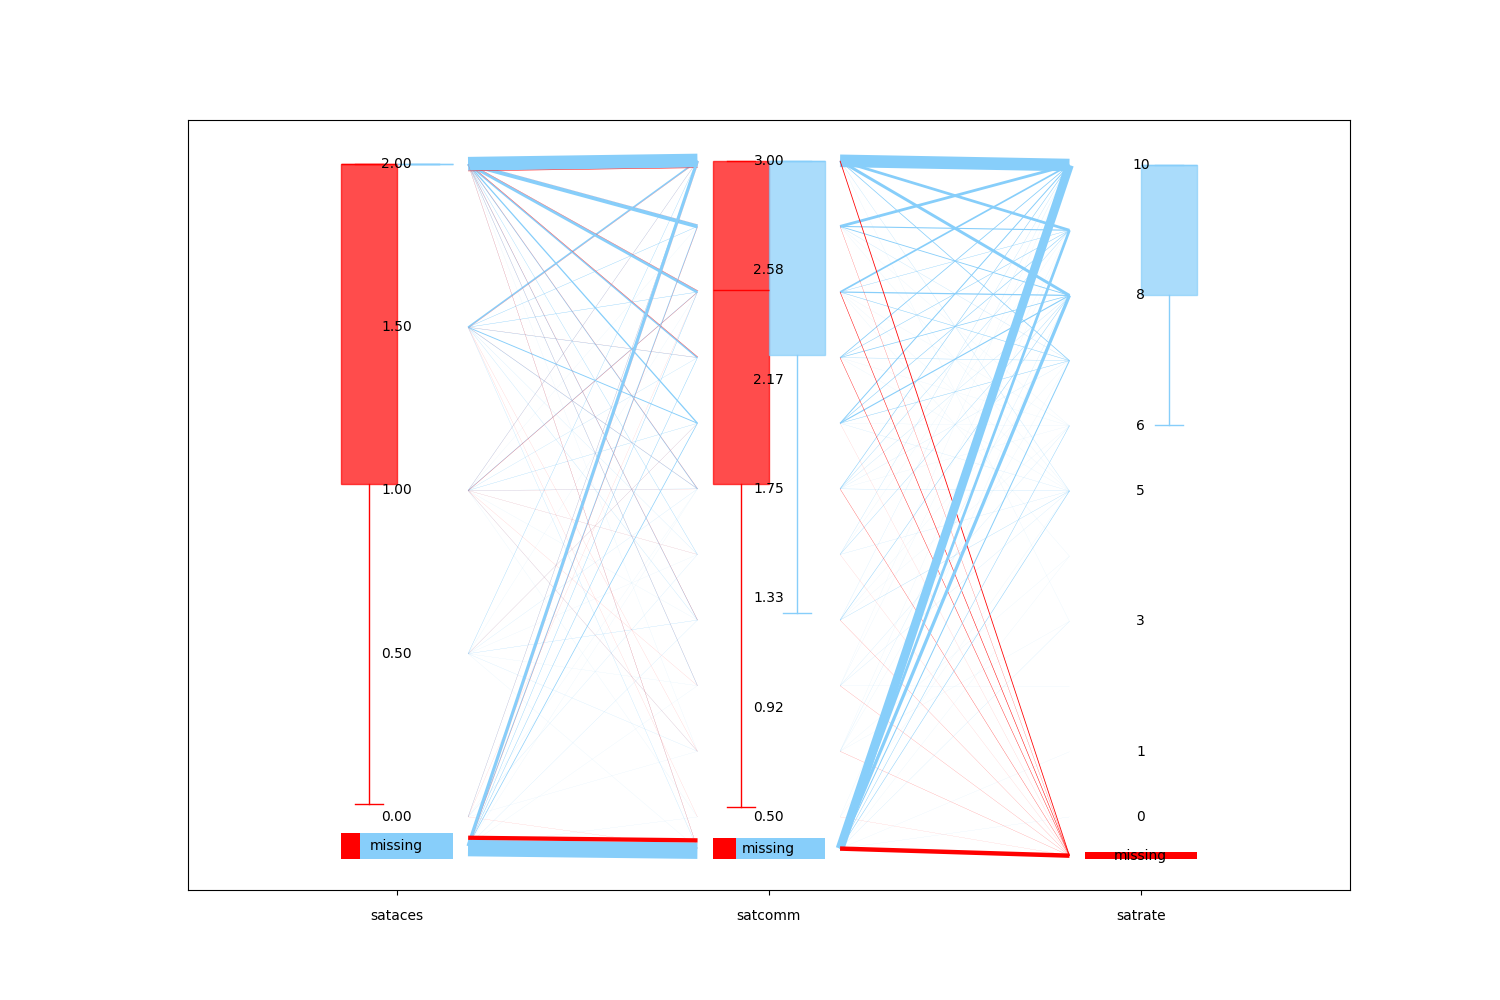

In [36]:
# highlight - missing = True
filename = "hi_missing.png"
df=df_diabetes

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    missing=True,
    display_figure=False,
    hi_var="satrate",
    hi_missing=True,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Missing Variable Test", filename)


## Custom highlight colour list


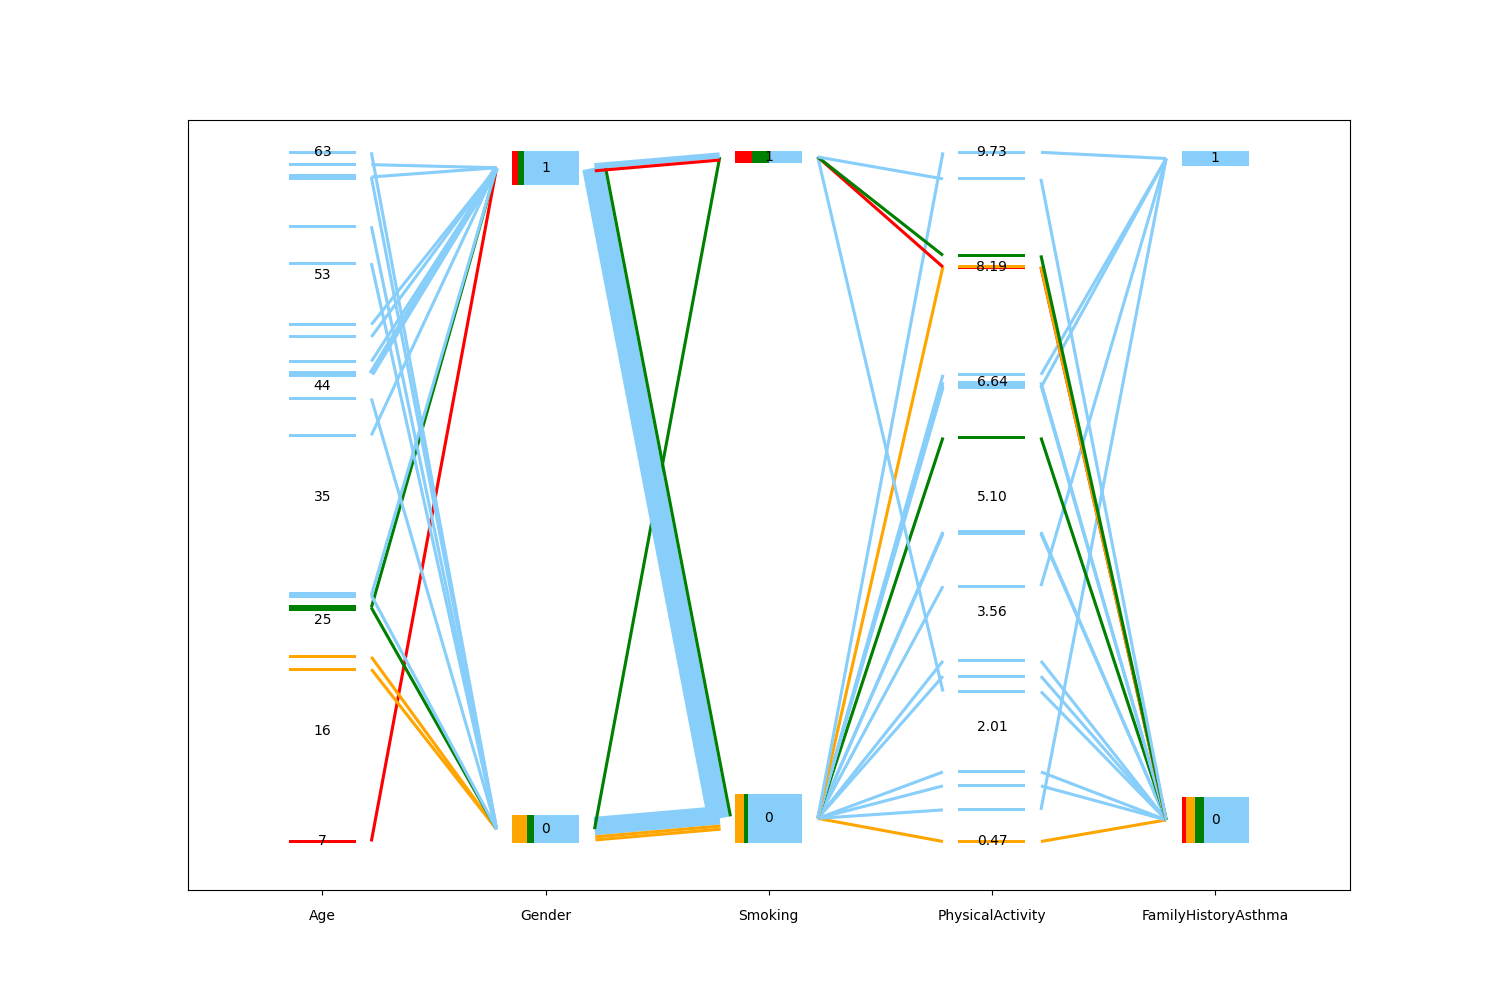
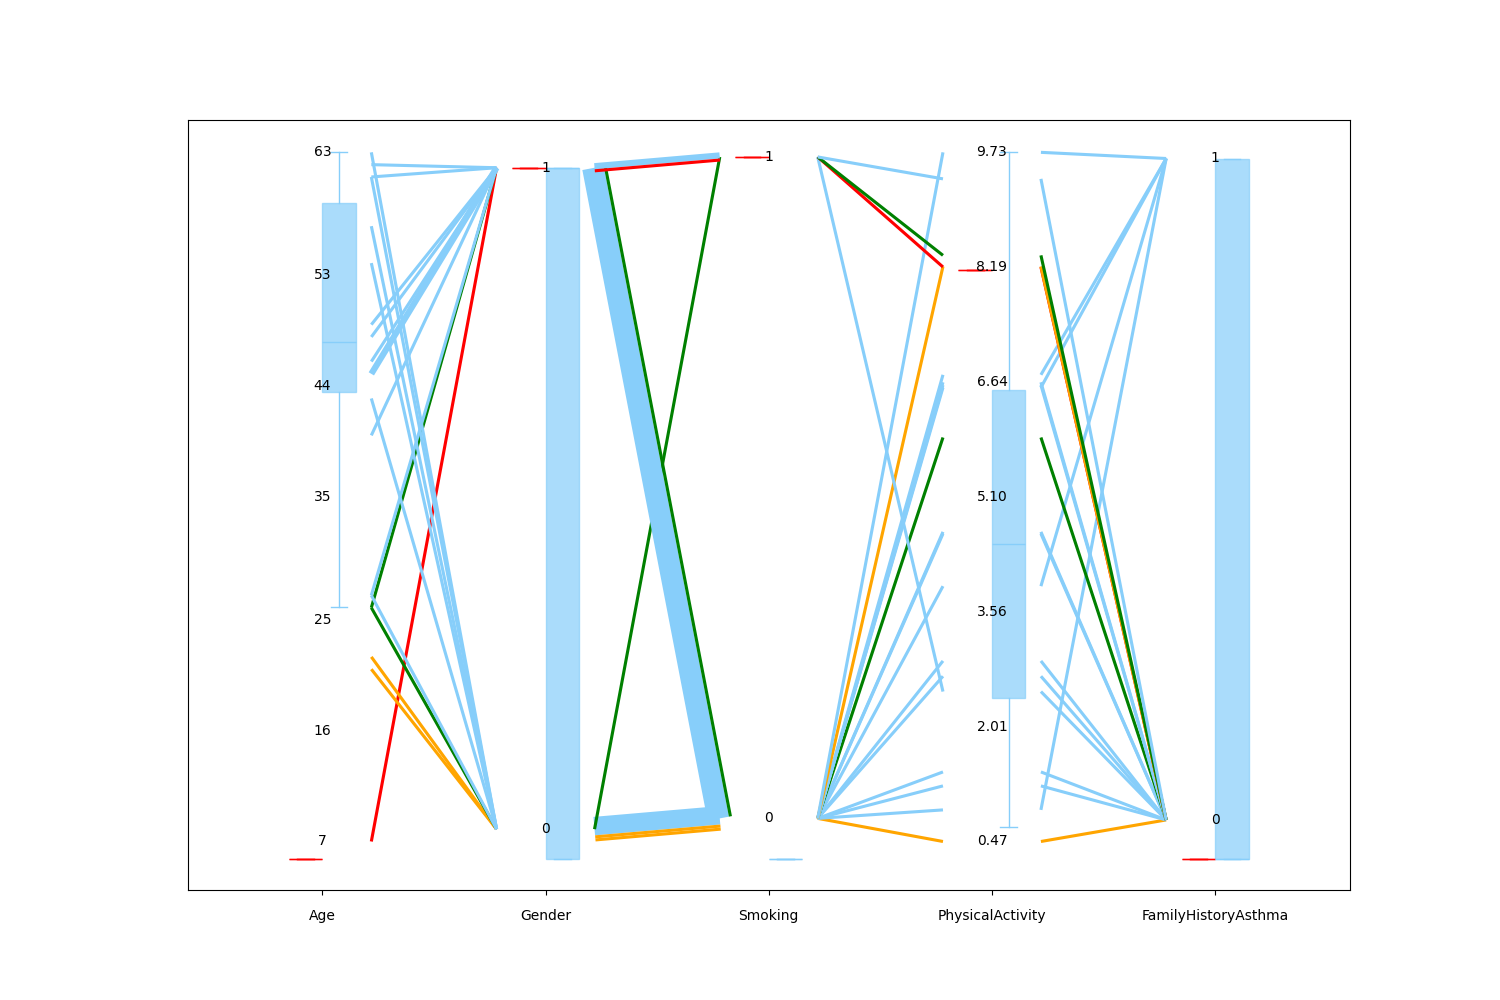

In [37]:
# highlight - modified colours
# QUESTION: are these supposed to be rounded?

filename = "highlight_colours.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    hi_var = "Age",
    hi_value=[7, 21, 22, 26],
    colors=["red", "orange", "orange", "green"],
    missing=True,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Highlight Colours Test", filename)

## Different default colour


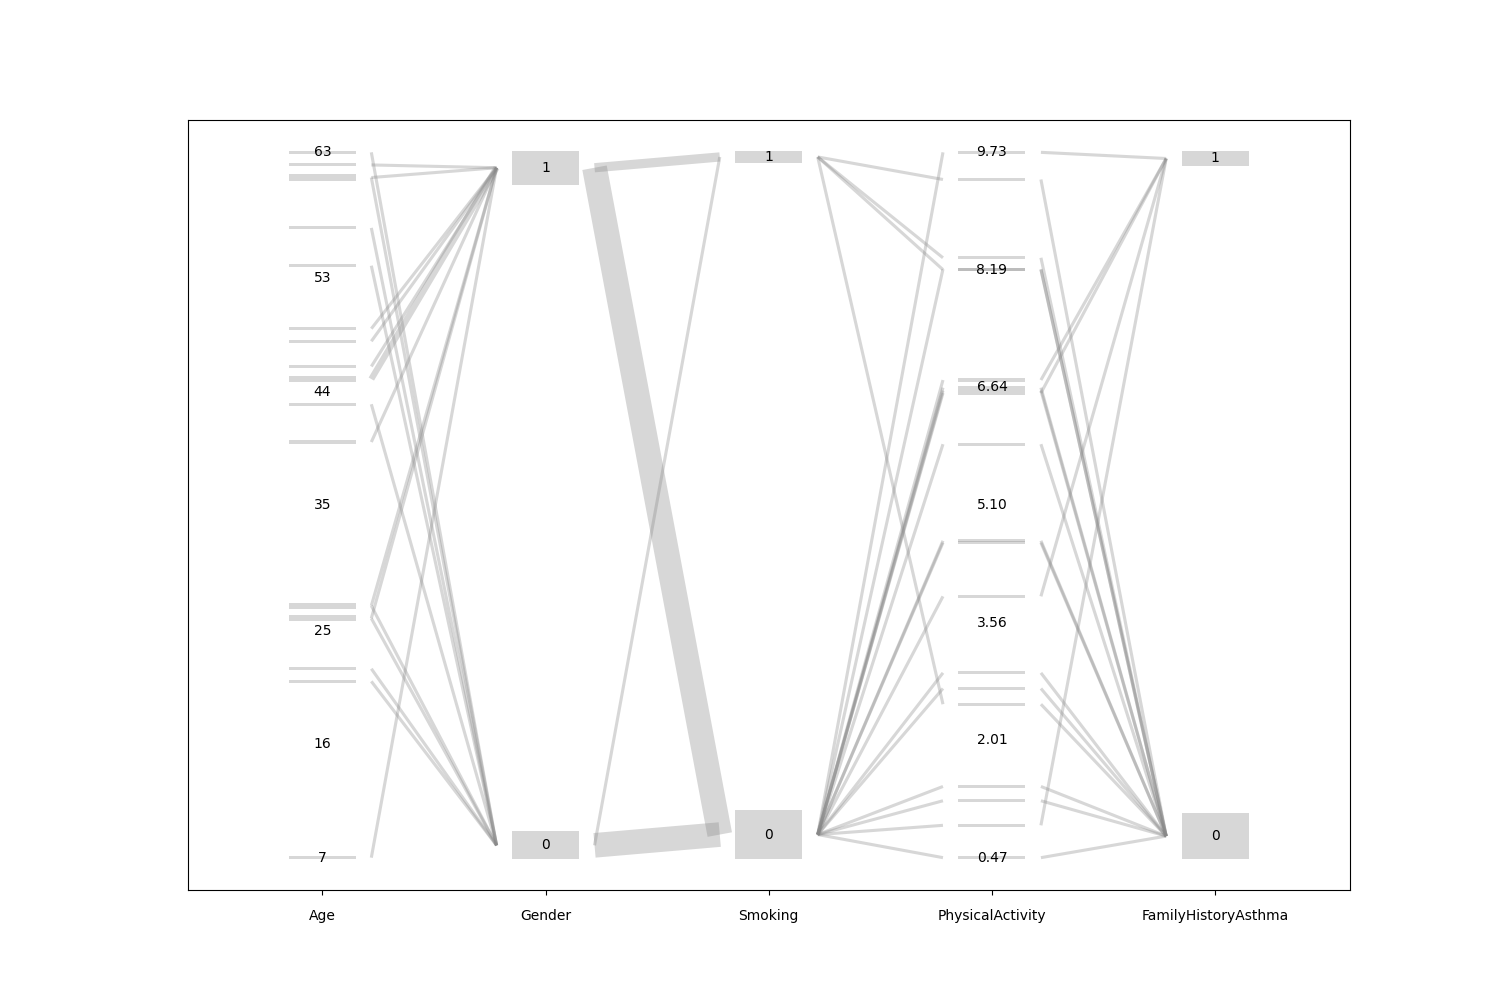
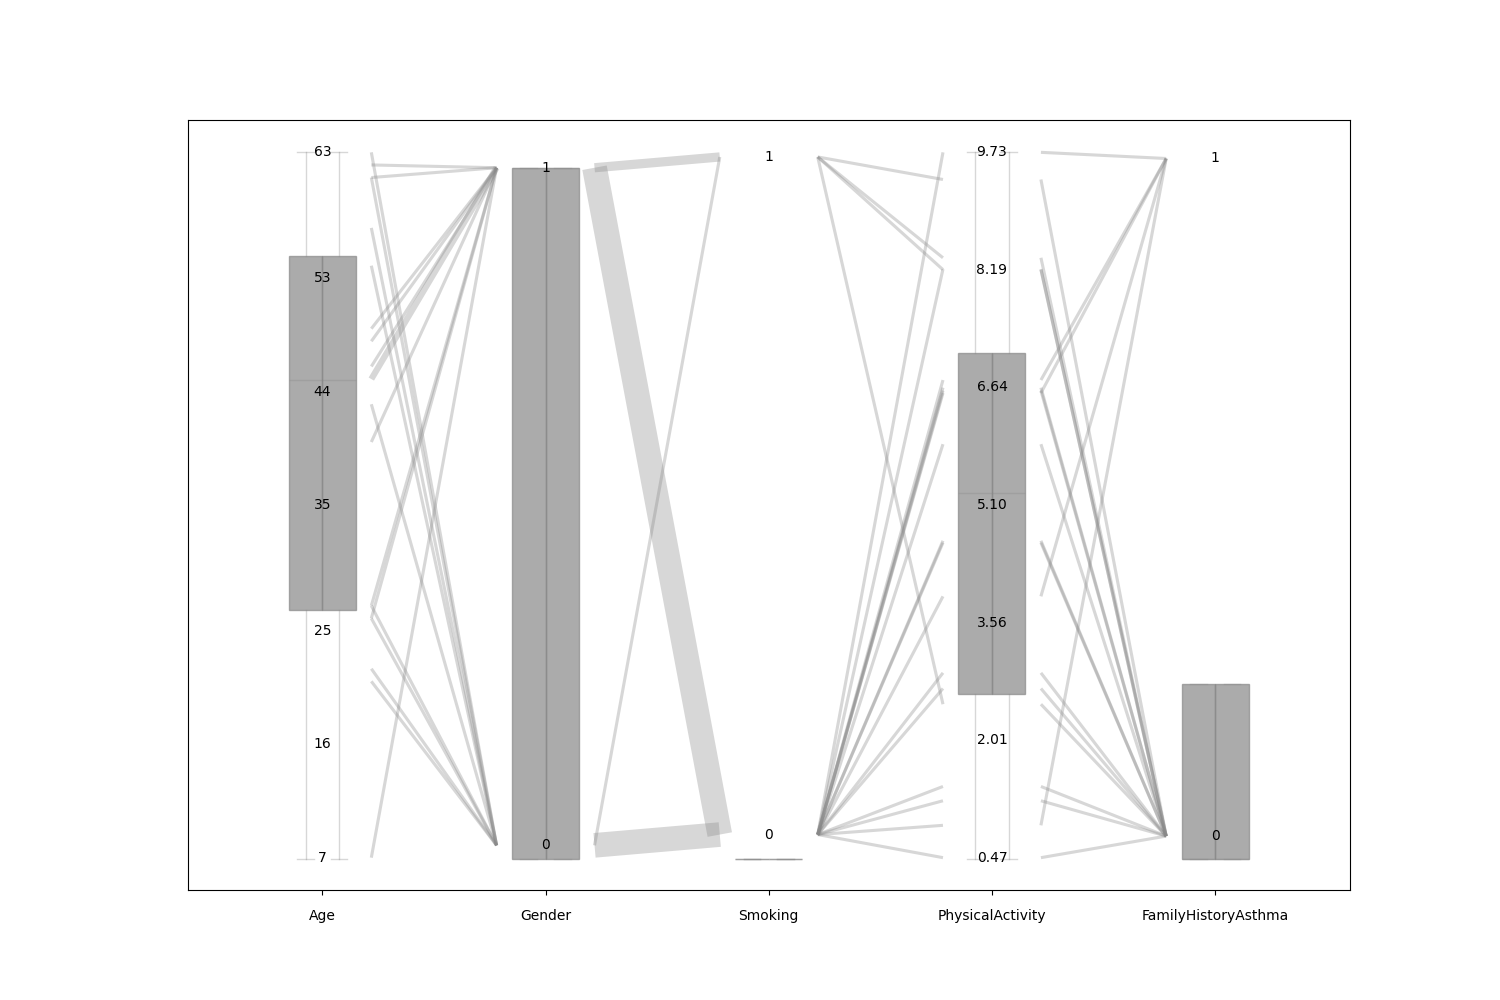

In [38]:
# highlight - modified default colour
filename = "default_colour.png"
df = df_asthma_2

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var= ["Age", "Gender", "Smoking", "PhysicalActivity", "FamilyHistoryAsthma"],
    display_figure=False,
    default_color="#88888855",
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Default Colour Test", filename)

# Spacing & Layout tests
Test cases involving "spacing and layout" hammock plot methods (following the categories in README.md)

## Bar width


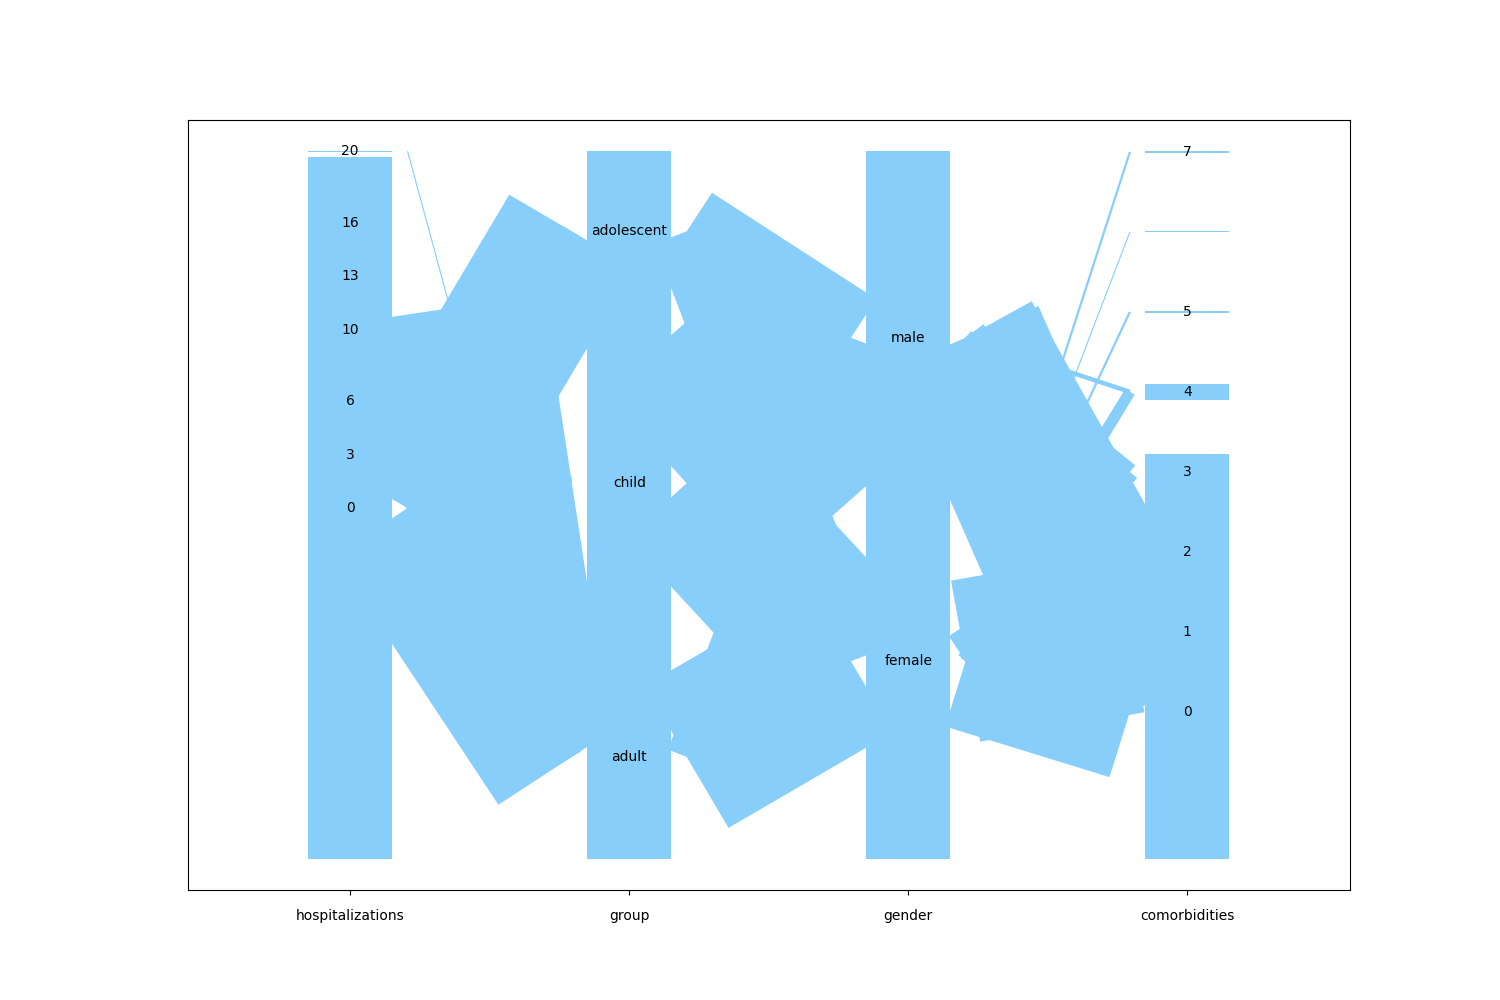
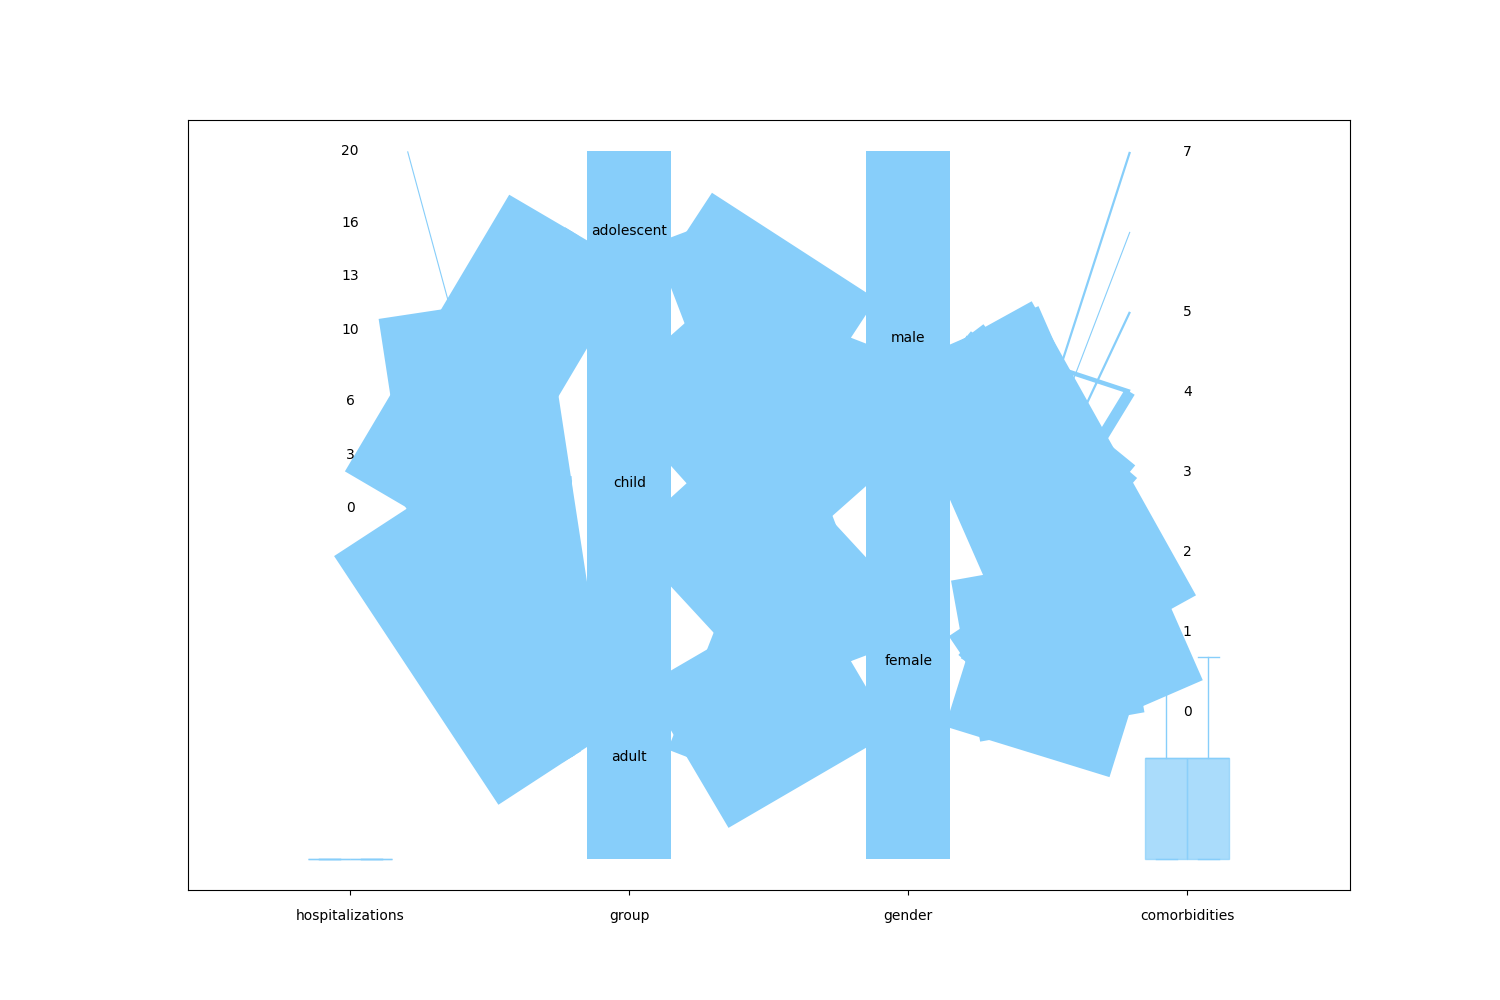

In [39]:
# spacing & layout - bar width
filename = "bar_width.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    uni_fraction=1,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Label Space


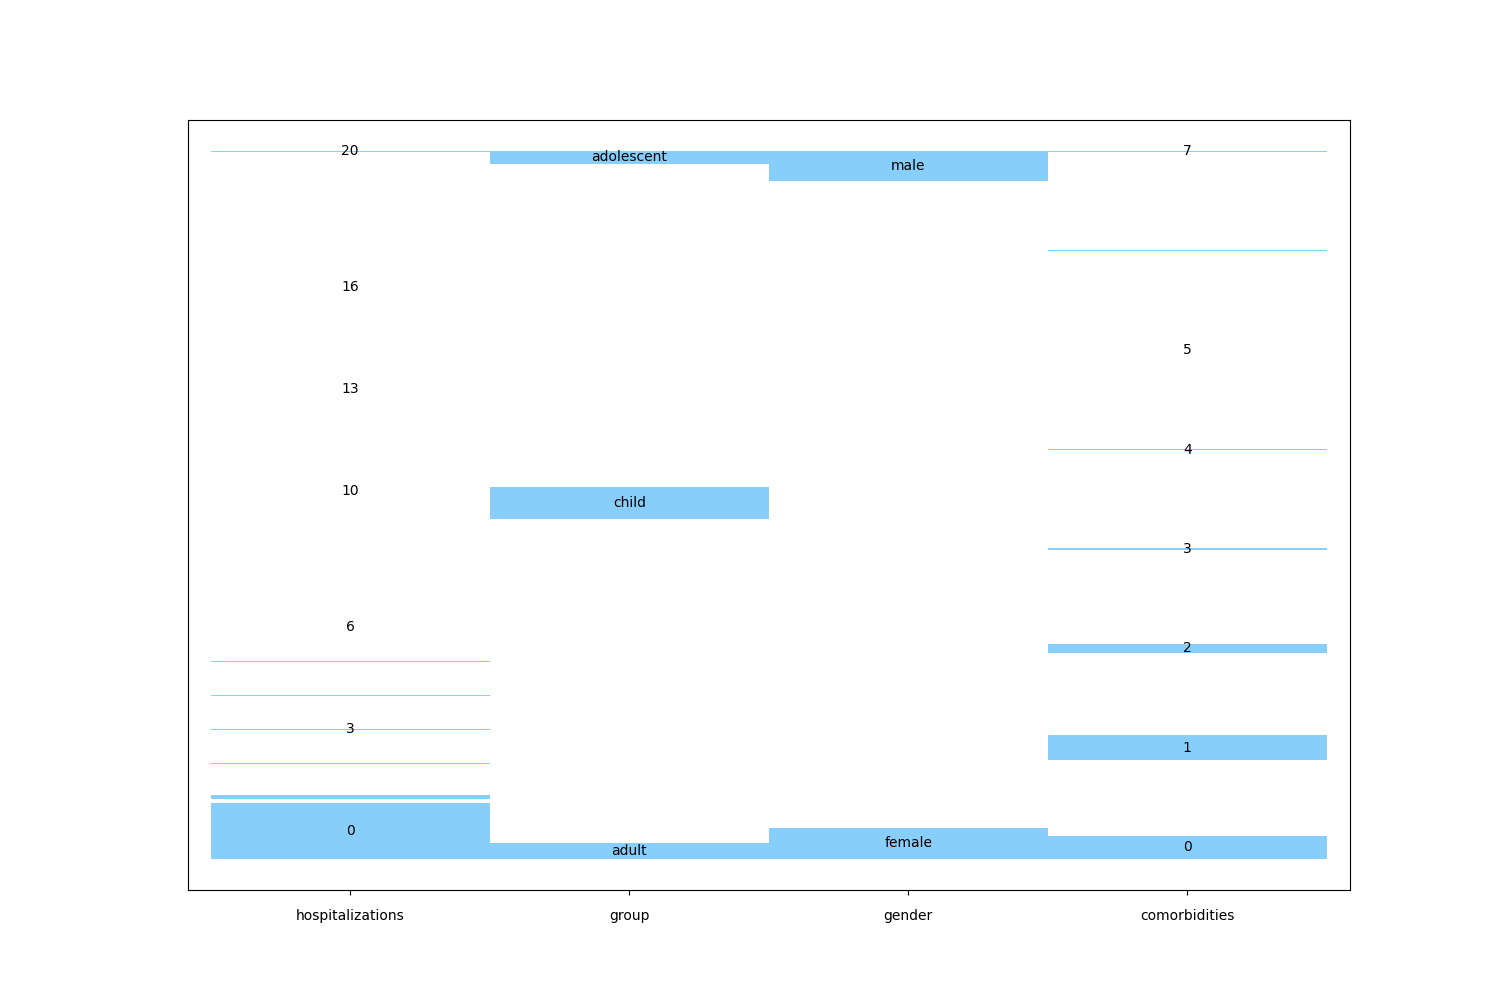
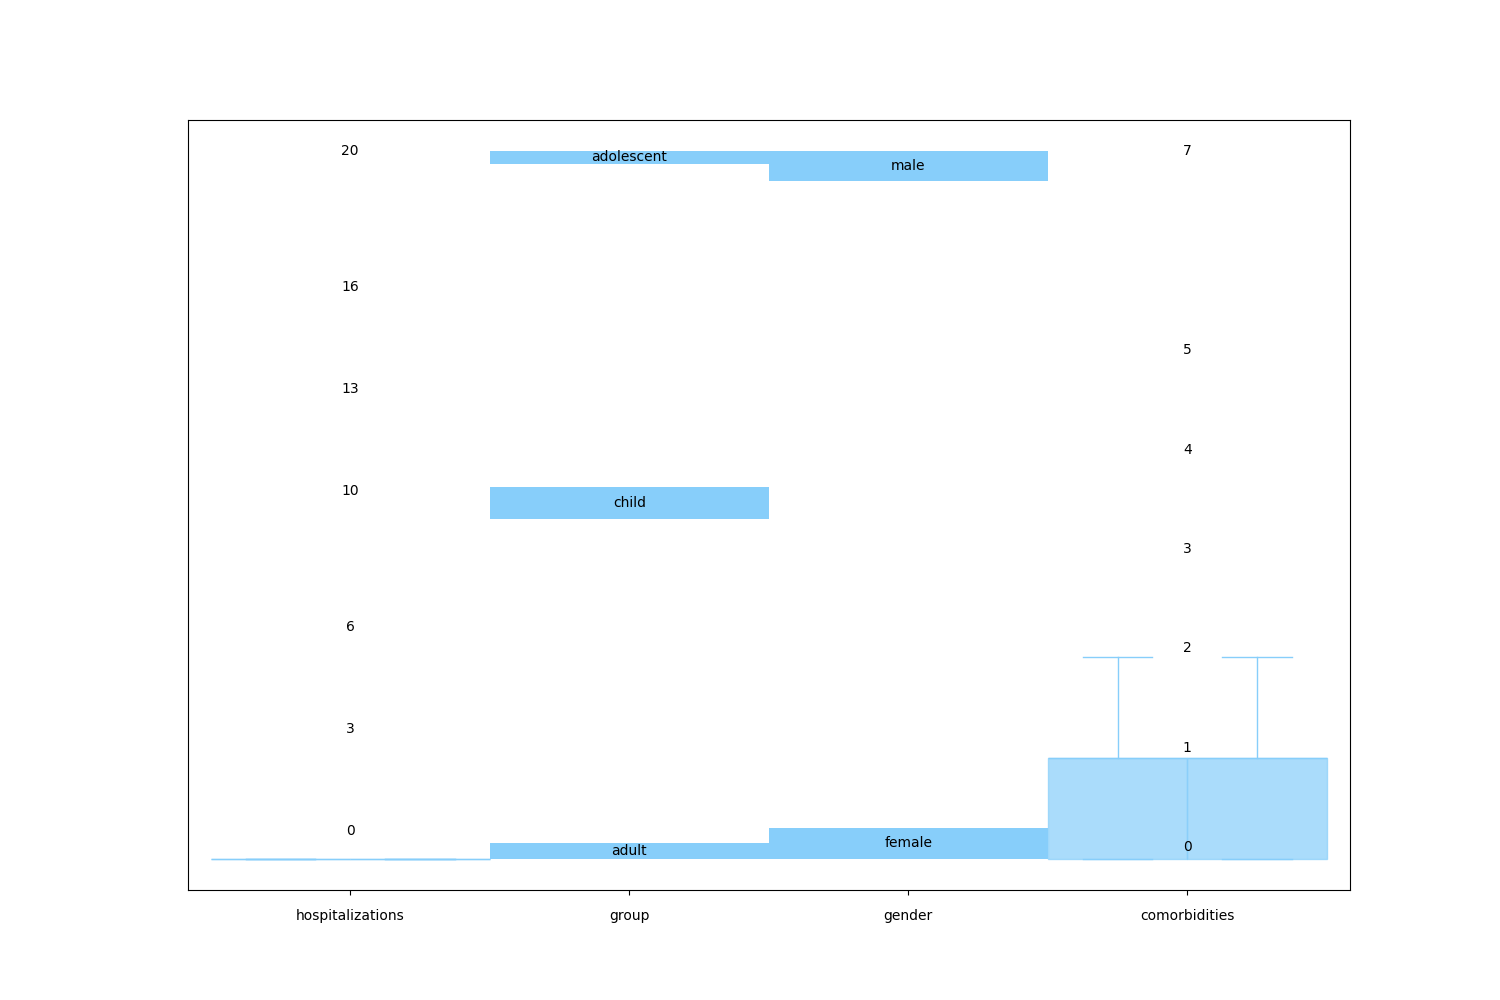

In [40]:
# spacing & layout - space between labels
# NOTE (to self): not sure if I completely understand this parameter
filename = "space.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    space=1,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Label options

In [41]:
# spacing & layout - label options (matplotlib)

## Plot height


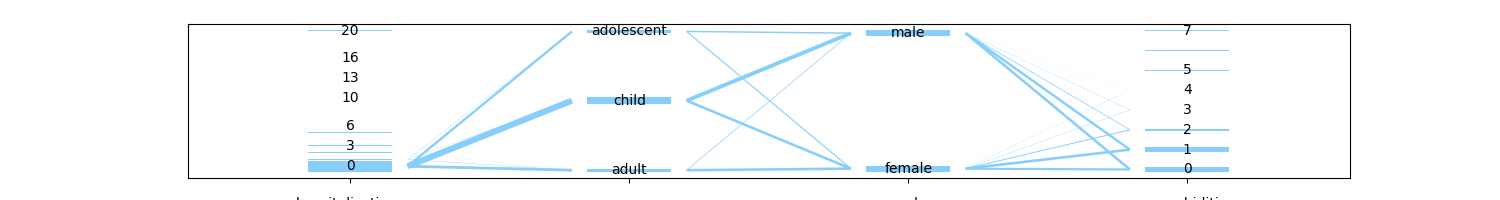
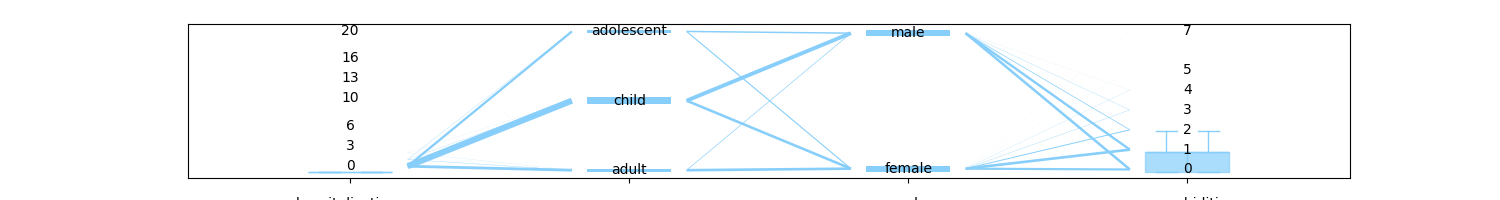

In [42]:
# spacing & layout - plot height
filename = "plot_height.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    height=2,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Plot width


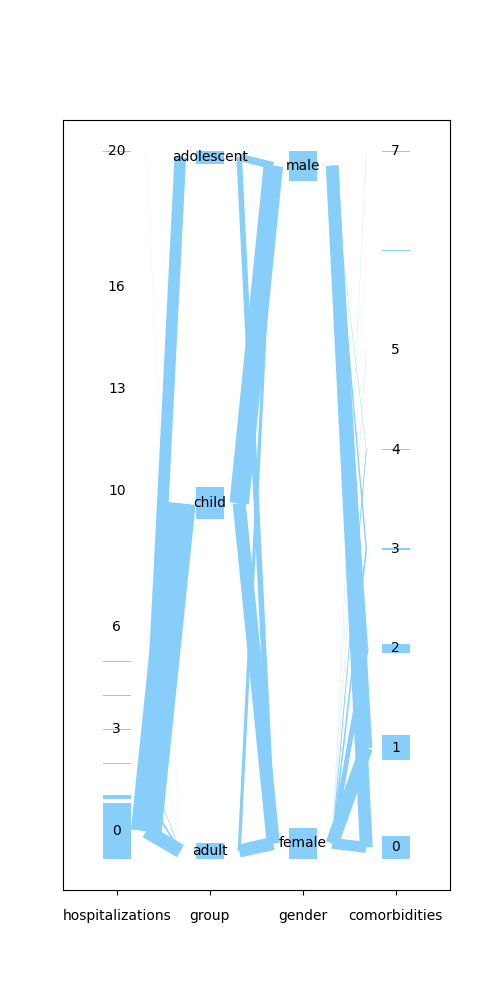
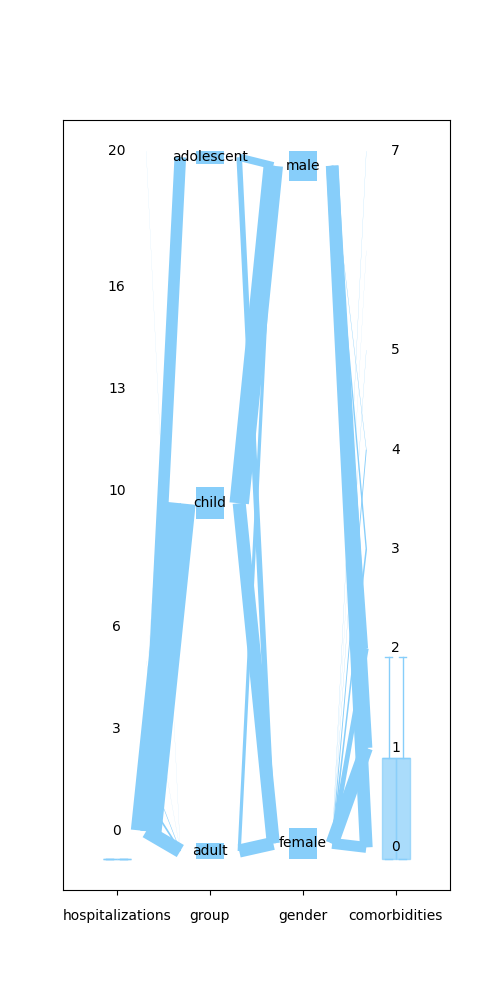

In [43]:
# spacing & layout - plot width
filename = "plot_width.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    width=5,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Min bar height


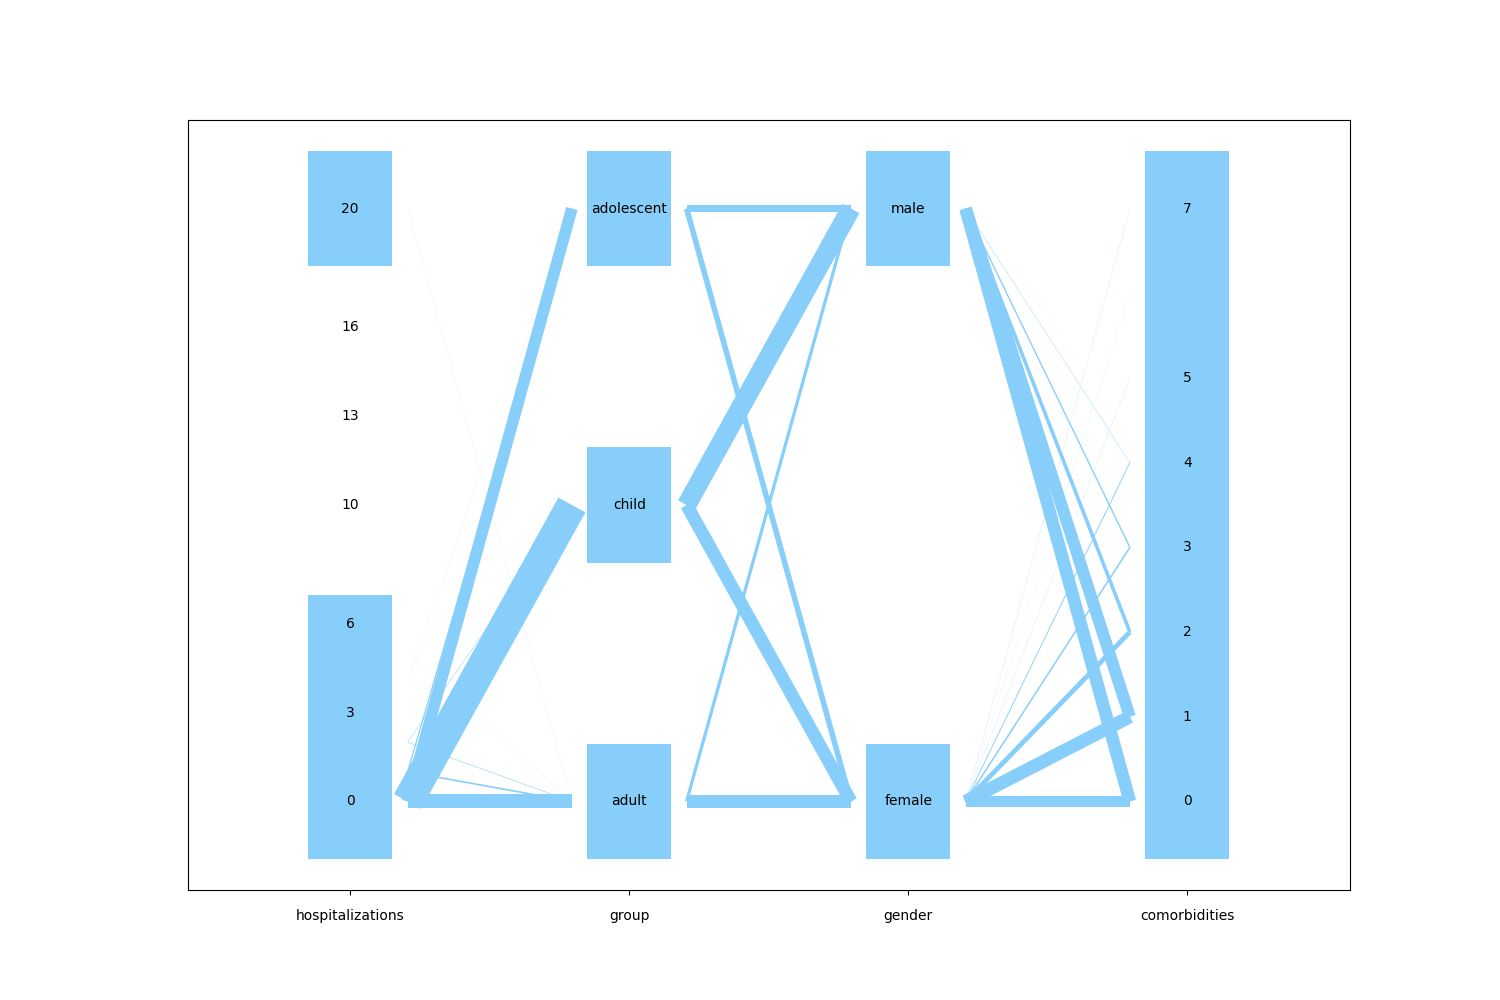
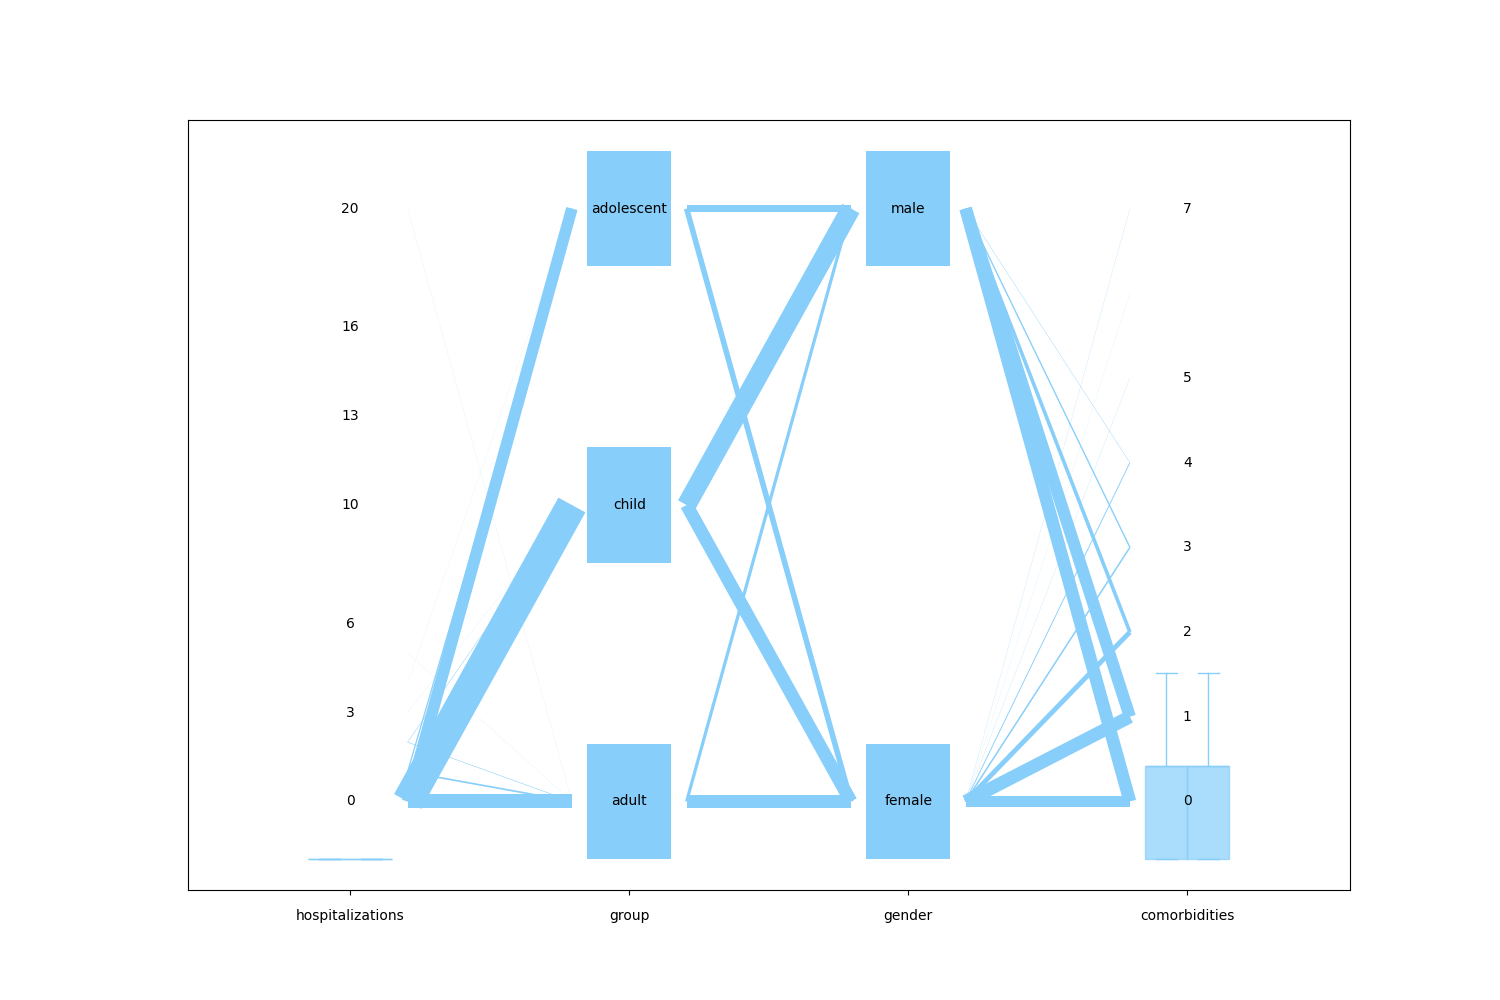

In [44]:
# spacing & layout - min bar width
filename = "min_bar_height.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    min_bar_height=15,
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

# Other tests
Test cases involving "other" hammock plot methods (following the categories in README.md)

## Shape


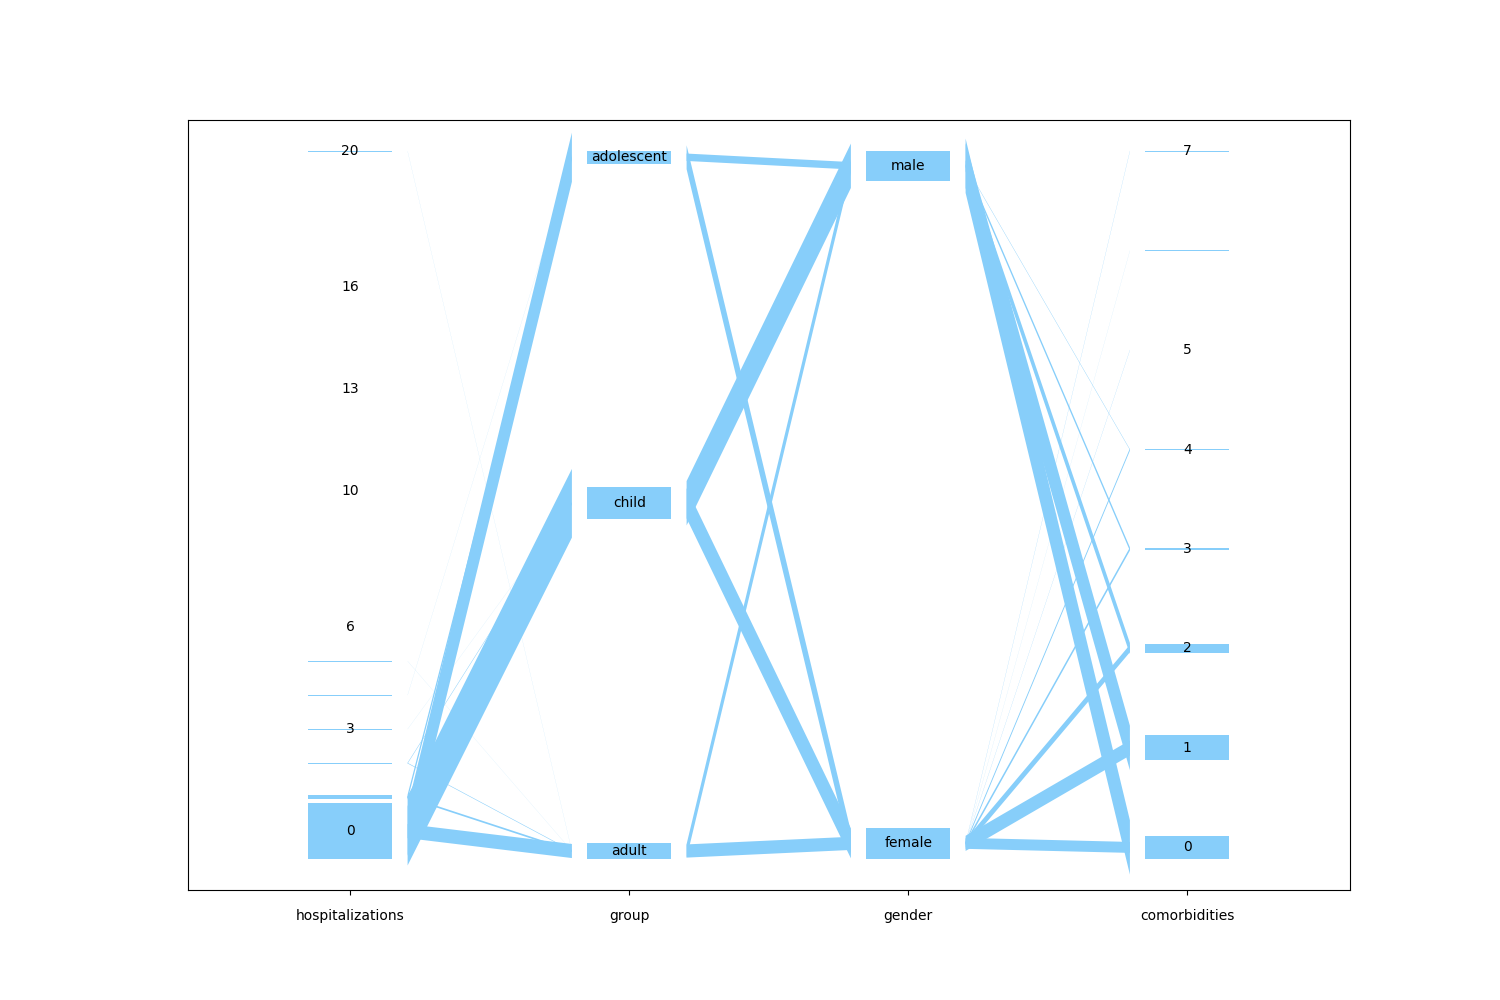
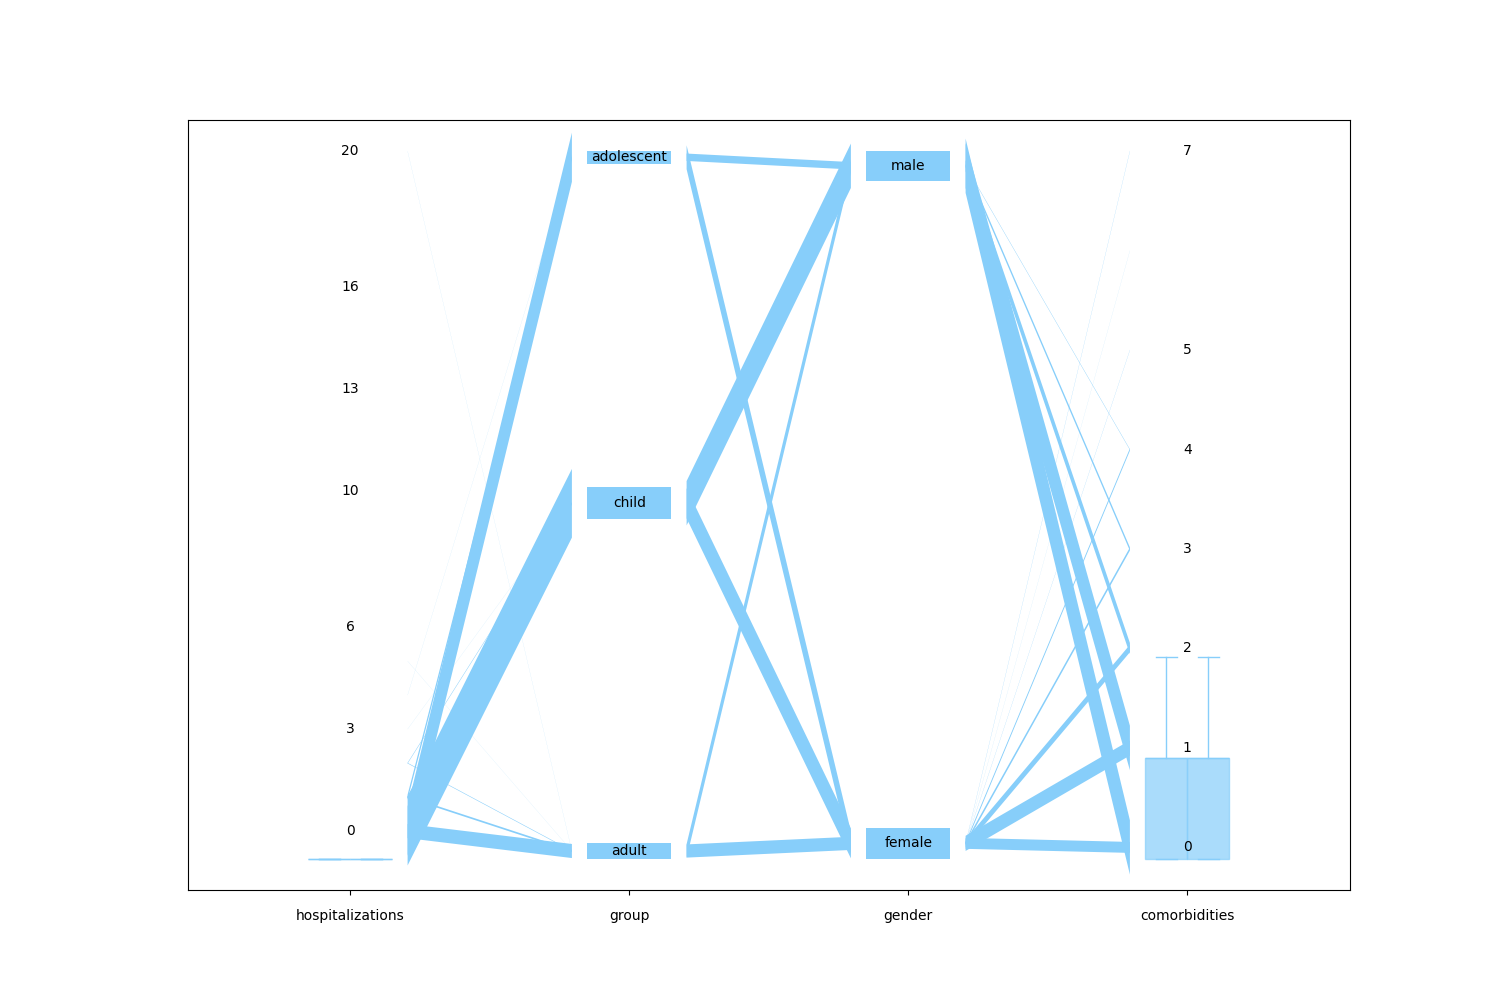

In [45]:
# other - shape
filename = "shape.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    shape="parallelogram",
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Same scale

same scale - numerical


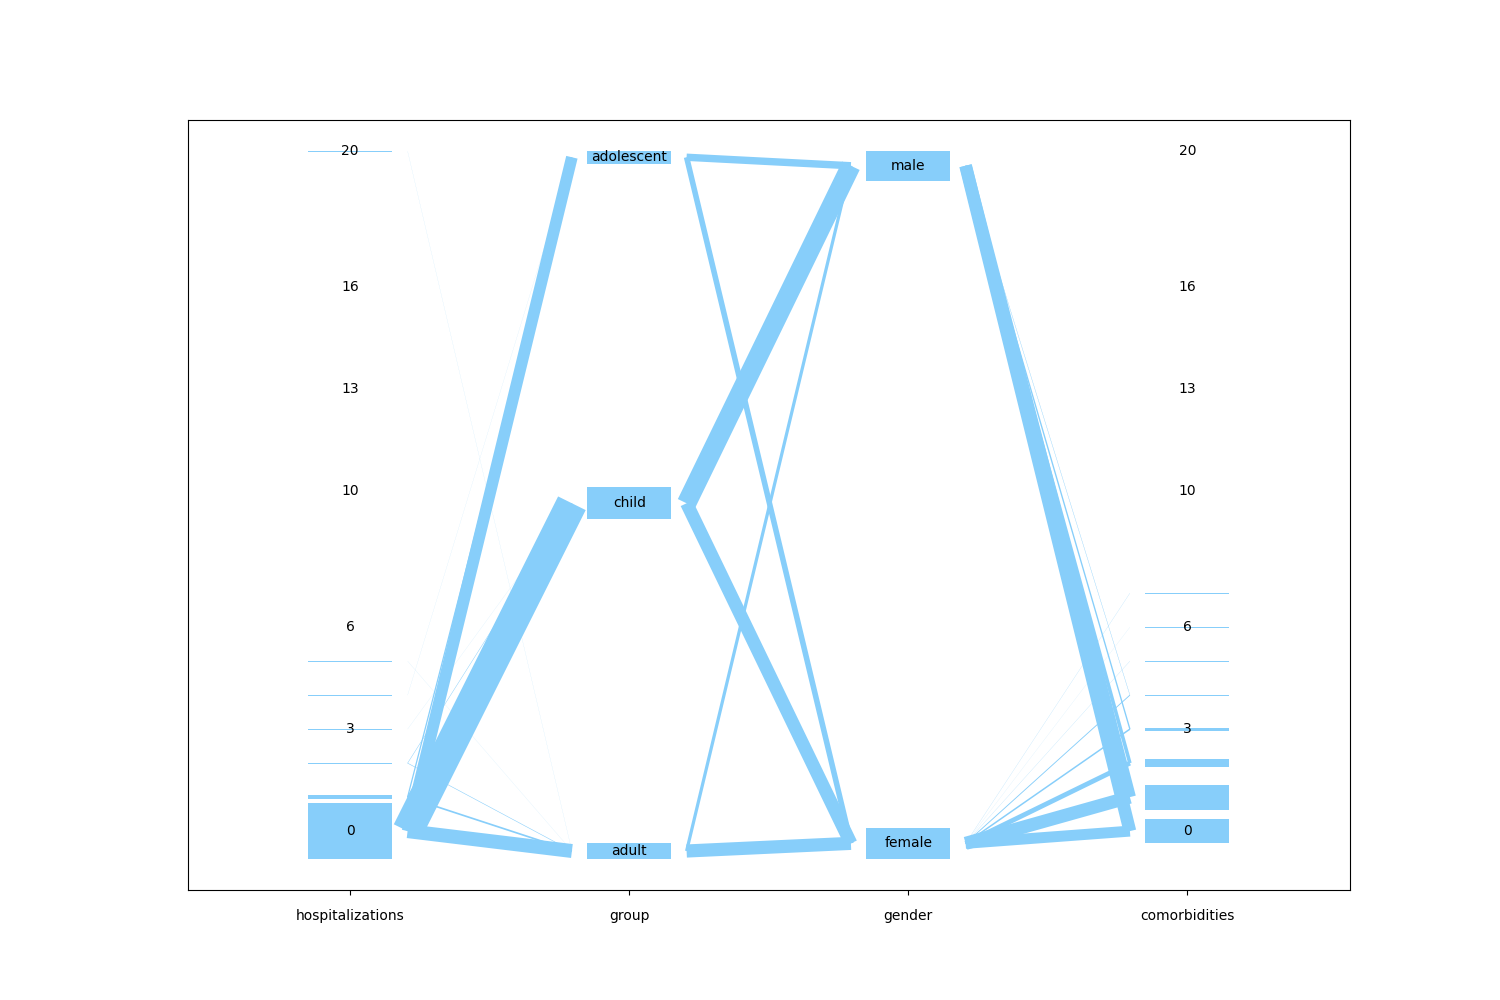
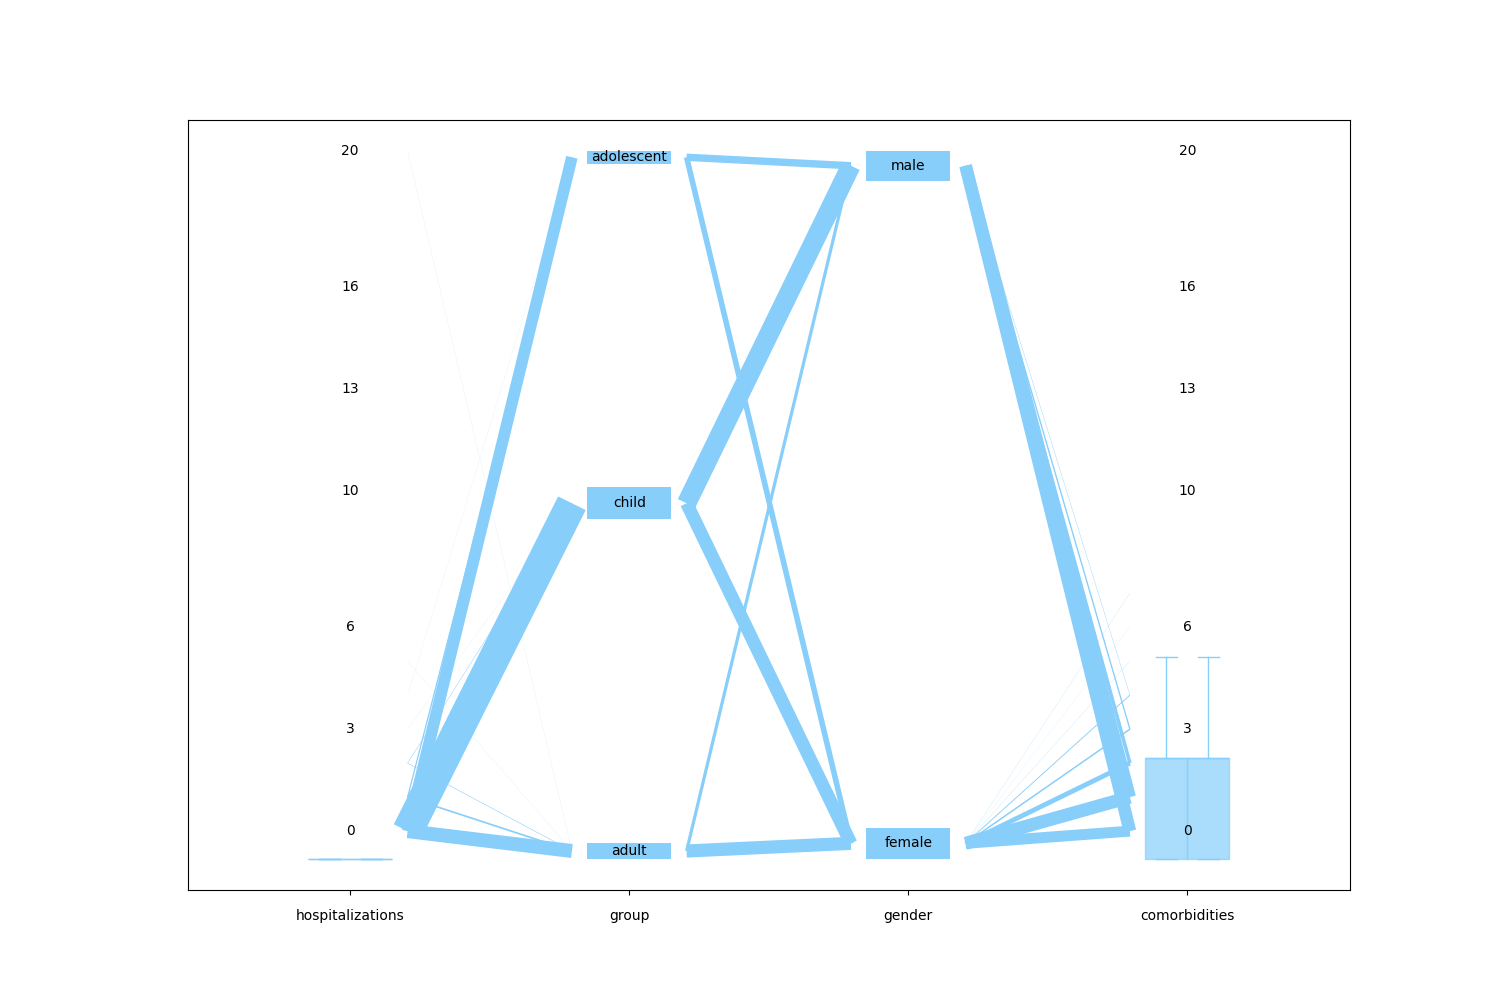

In [46]:
# other - same_scale - numeric
filename = "same_scale_numeric.png"

df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    same_scale=["hospitalizations", "comorbidities"],
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

same scale - categorical


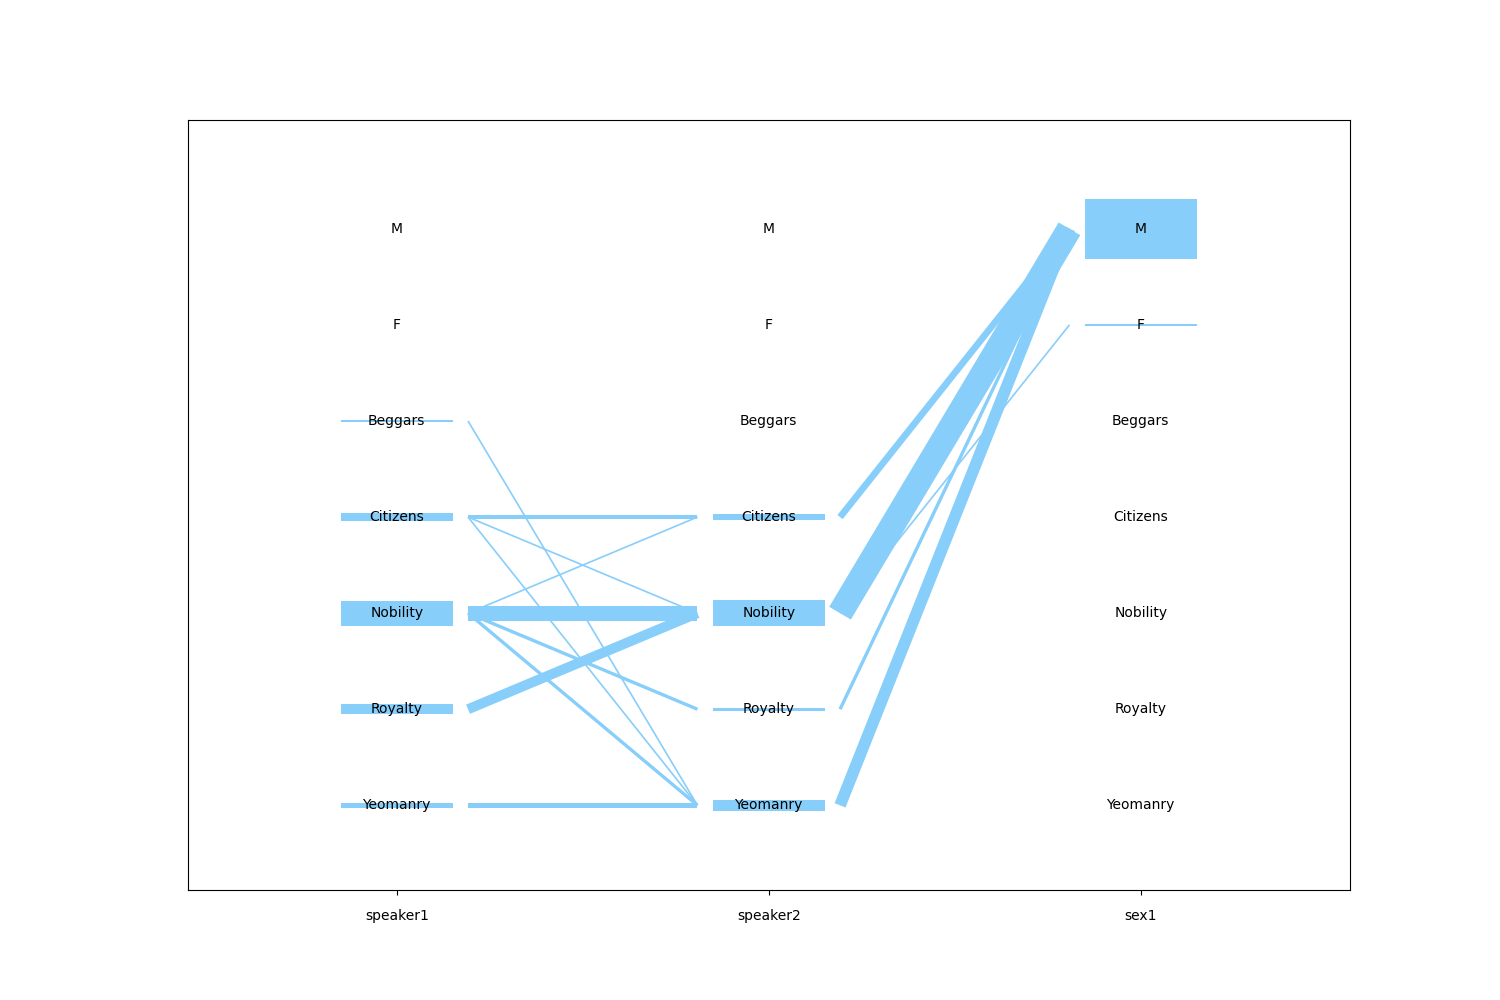
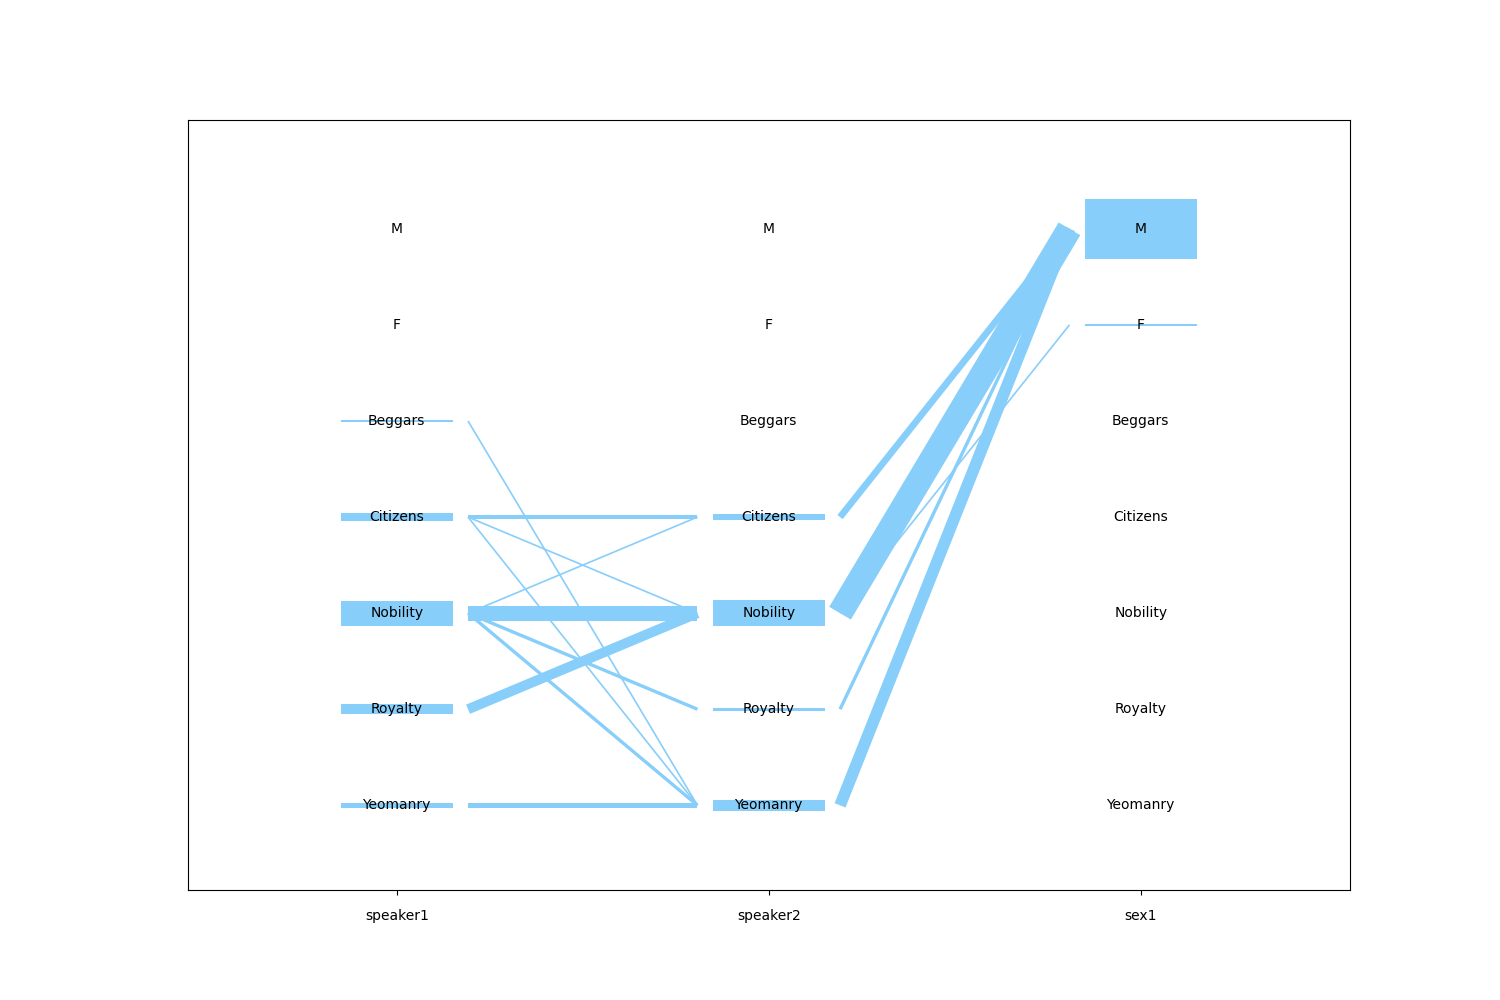

In [47]:
# other - same_scale - categorical
filename = "same_scale_categorical.png"

df = df_shakespeare

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=["speaker1", "speaker2","sex1"],
    same_scale=["speaker1", "speaker2", "sex1"],
    value_order={"speaker1": ["Yeomanry", "Royalty", "Nobility", "Citizens", "Beggars", "F", "M"]},
    display_figure=False,
    save_path=os.path.join(EXPECTED_PATH if GENERATE_EXPECTED else RESULT_PATH, filename)
)
if not GENERATE_EXPECTED: show_expected_vs_actual("Display Label Test", filename)

## Display figure

<Axes: >

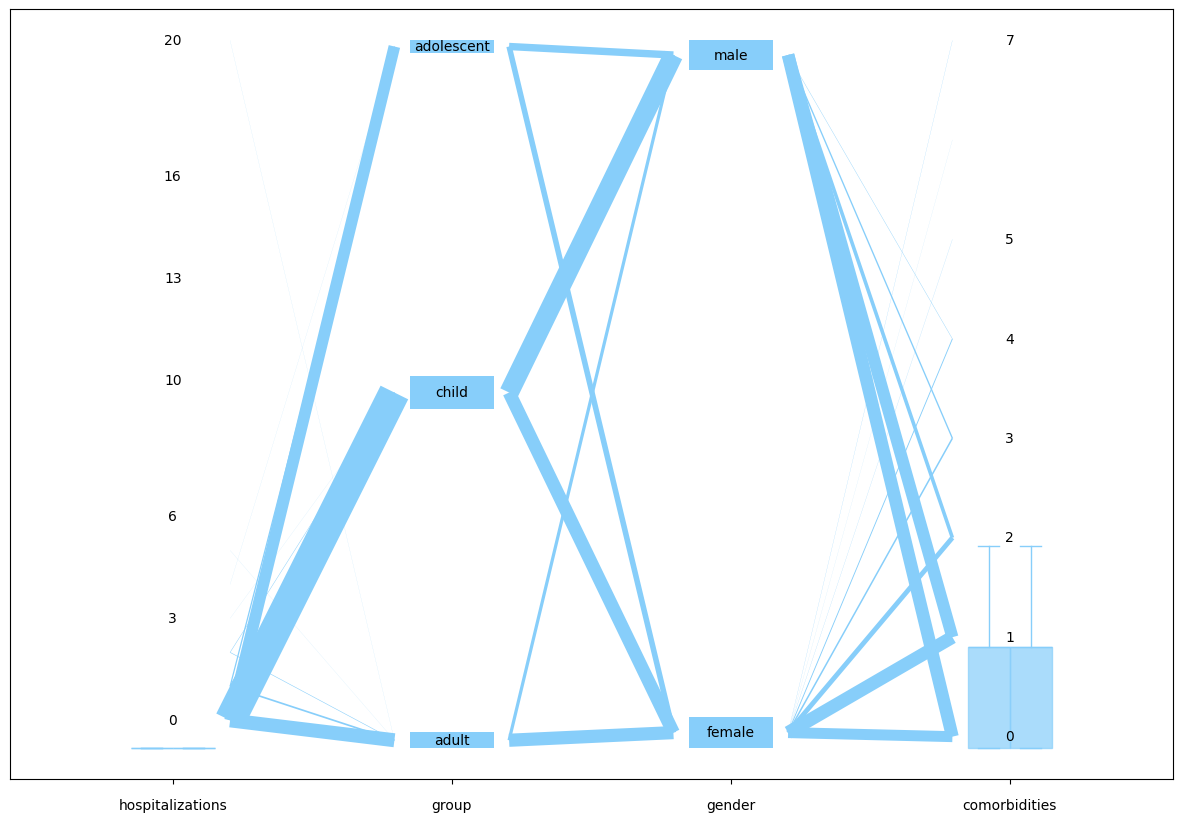

In [48]:
# other - display_figure
# success = figure displays successfully
df = df_asthma

hammock = hammock_plot.Hammock(df)

hammock.plot(
    var=list(df),
    display_figure=True
)